# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



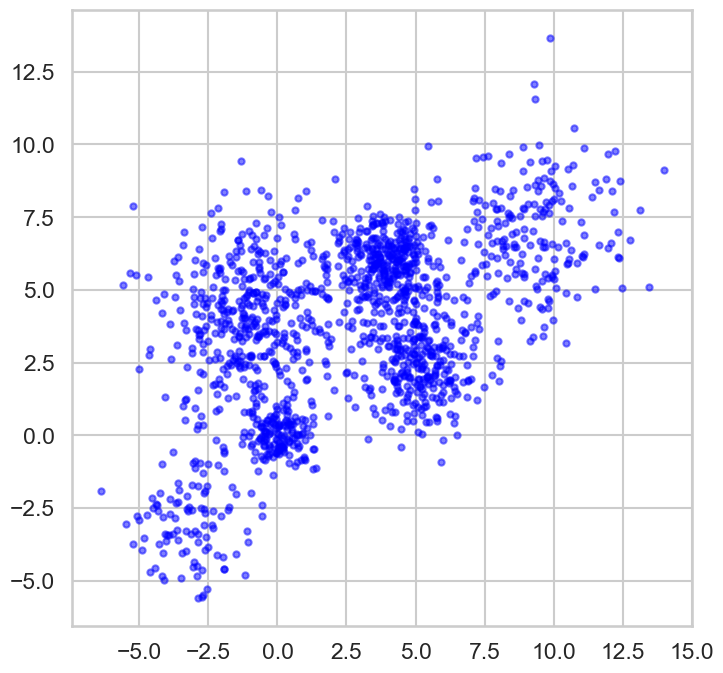

In [3]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

Found 0 outliers.


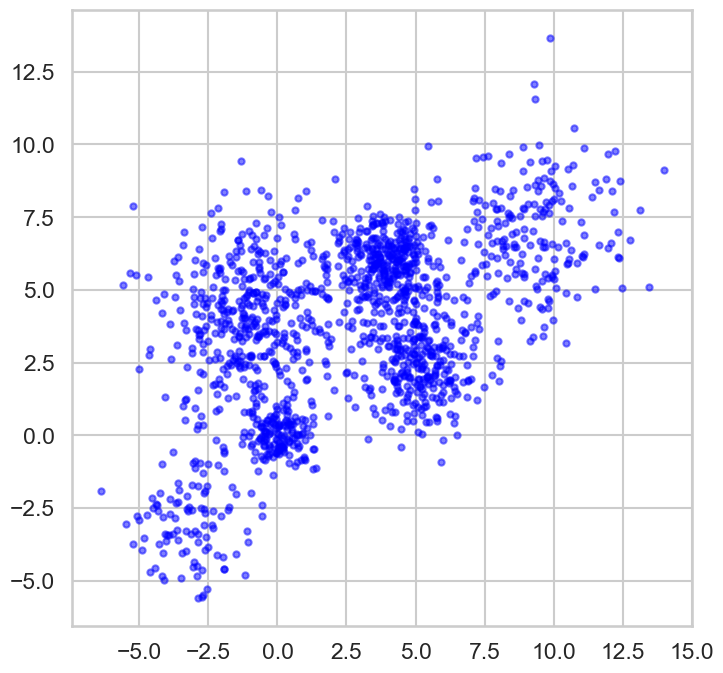

In [ ]:
def detect_outliers_modified_z(data, threshold=3.5):
    """
    Detects outliers using Modified Z-Score (better for skewed/small data).
    
    Parameters:
        data (array-like): 1D or 2D input data.
        threshold (float): Default=3.5 (adjust based on sensitivity).
    
    Returns:
        outlier_mask (bool array): True = outlier.
    """
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    
    median = np.median(data, axis=0)
    mad = np.median(np.abs(data - median), axis=0)
    mad[mad == 0] = 1e-9  # Avoid division by zero
    
    modified_z = 0.6745 * (data - median) / mad
    max_z = np.max(np.abs(modified_z), axis=1)  # For multi-dimensional data
    
    return max_z > threshold

# Usage:
outliers = detect_outliers_modified_z(Multi_blob_Data)
print(f"Found {outliers.sum()} outliers.")
cleaned_data = Multi_blob_Data[~outliers]
display_cluster(cleaned_data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

For k=2:
   SSD (Distortion Function): 16716.6192
   Silhouette Score: 0.4752

For k=3:
   SSD (Distortion Function): 12094.7971
   Silhouette Score: 0.4363

For k=4:
   SSD (Distortion Function): 7812.1441
   Silhouette Score: 0.4629

For k=5:
   SSD (Distortion Function): 5600.1915
   Silhouette Score: 0.4809

For k=6:
   SSD (Distortion Function): 4310.2969
   Silhouette Score: 0.4860

For k=7:
   SSD (Distortion Function): 3811.2118
   Silhouette Score: 0.4634



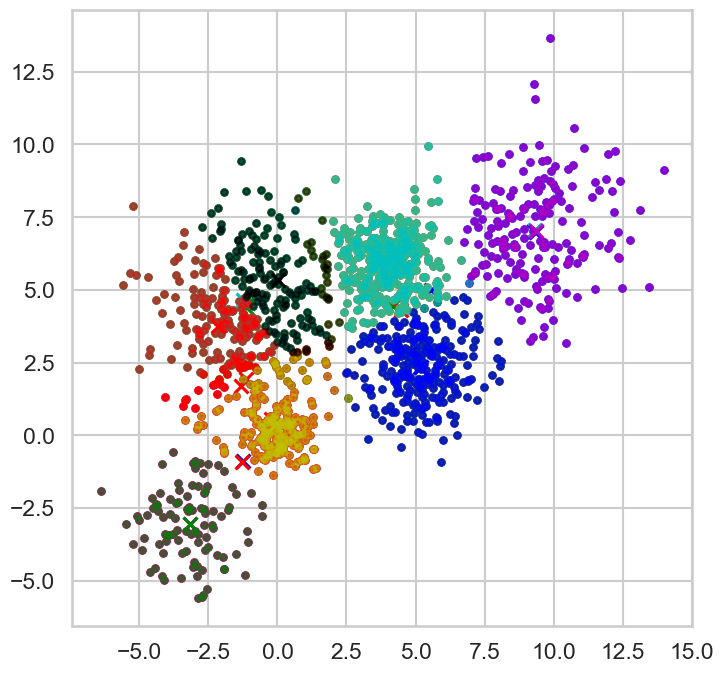

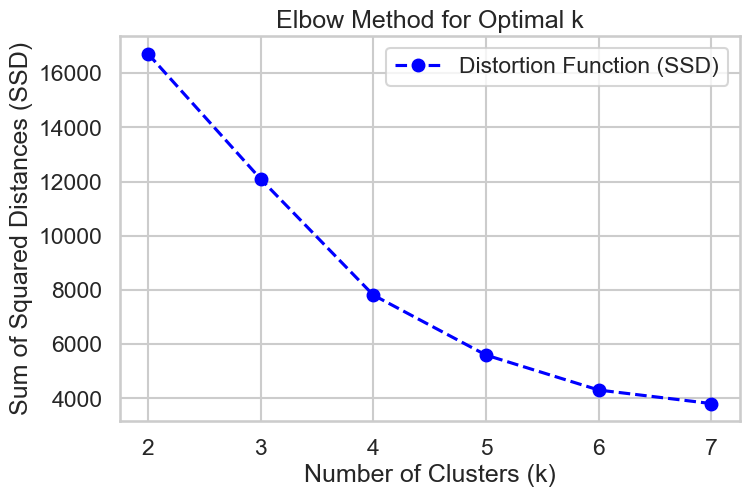

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []  # Stores the Sum of Squared Distances (SSD)
sil_scores = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(cleaned_data)
    
    cluster_labels = model.predict(cleaned_data)  # Predict clusters
    display_cluster(cleaned_data, model, k)  # Display clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssd.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(cleaned_data, cluster_labels)
    sil_scores.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()






For k=2:
   SSD (Distortion Function): 16716.6192
   Silhouette Score: 0.4752

For k=3:
   SSD (Distortion Function): 12094.7971
   Silhouette Score: 0.4363

For k=4:
   SSD (Distortion Function): 7812.1441
   Silhouette Score: 0.4629

For k=5:
   SSD (Distortion Function): 5600.1915
   Silhouette Score: 0.4809

For k=6:
   SSD (Distortion Function): 4310.2969
   Silhouette Score: 0.4860

For k=7:
   SSD (Distortion Function): 3811.2118
   Silhouette Score: 0.4634



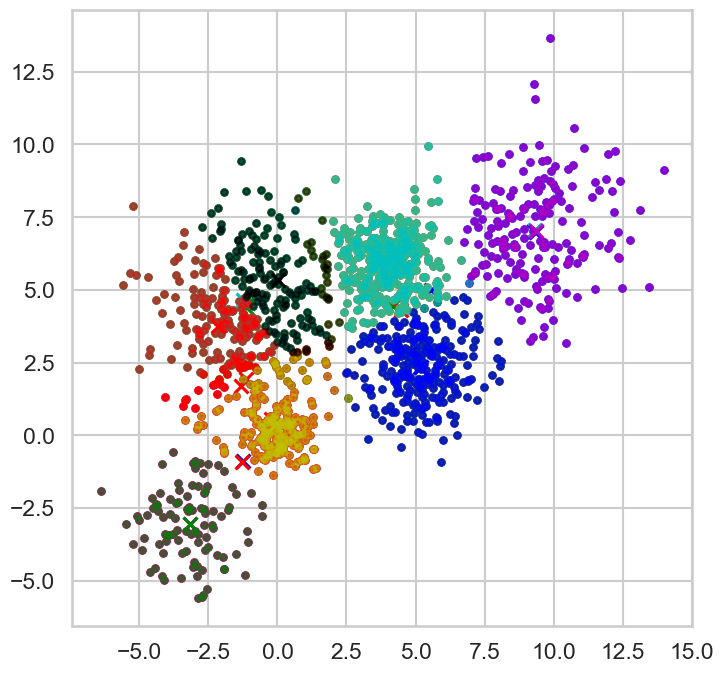

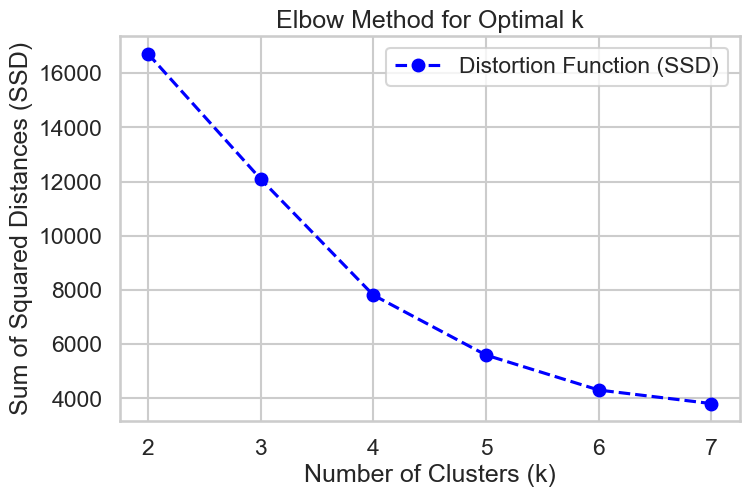

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []  # Stores the Sum of Squared Distances (SSD)
sil_scores = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(Multi_blob_Data)
    
    cluster_labels = model.predict(Multi_blob_Data)  # Predict clusters
    display_cluster(Multi_blob_Data, model, k)  # Display clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssd.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(Multi_blob_Data, cluster_labels)
    sil_scores.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()






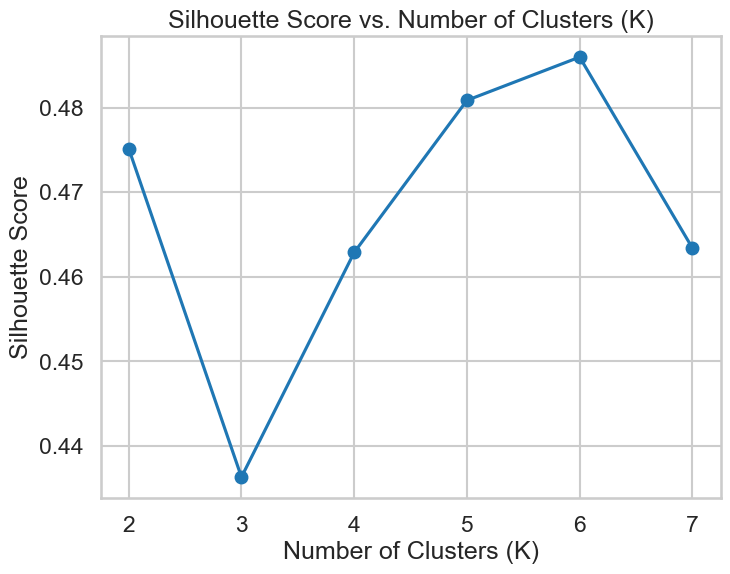

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

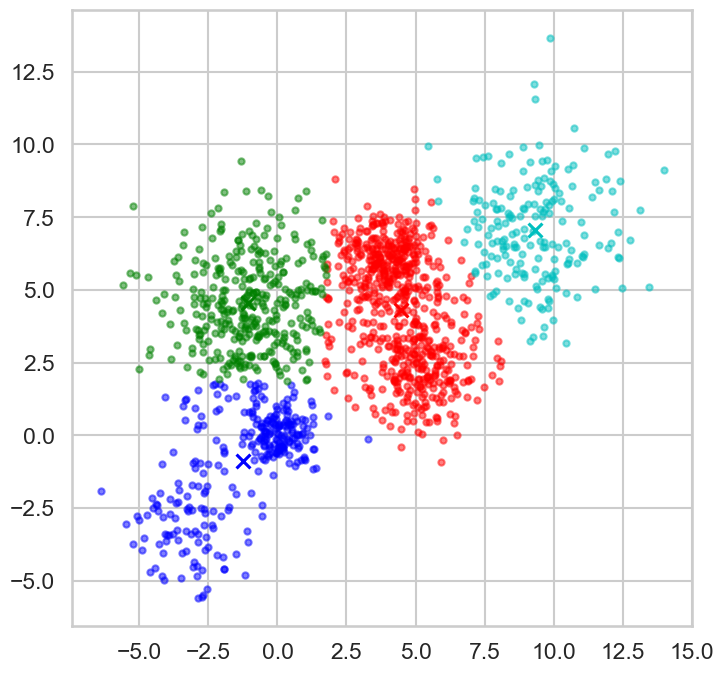

In [ ]:
model = KMeans(n_clusters=4, random_state=42, n_init=10)  
model.fit_predict(Multi_blob_Data)
display_cluster(Multi_blob_Data, model, 4)

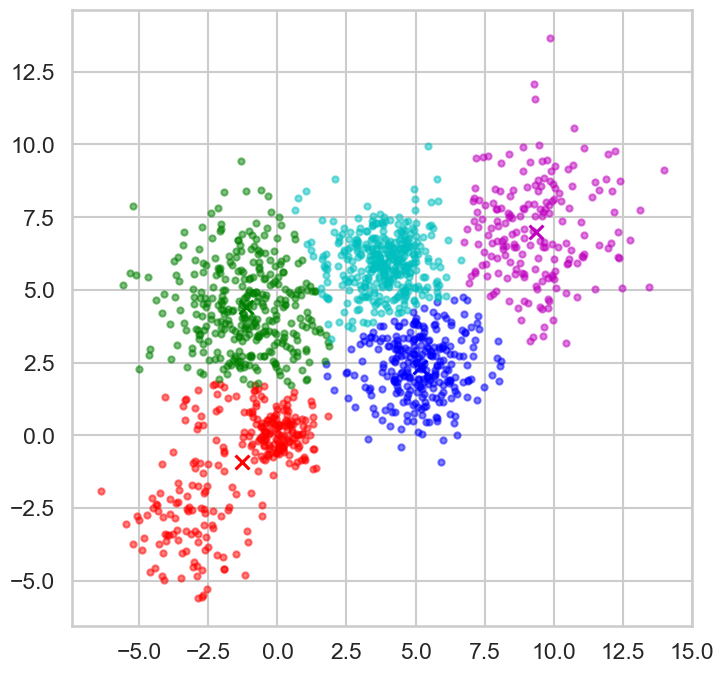

In [ ]:
model = KMeans(n_clusters=5, random_state=42, n_init=10) 
model.fit_predict(Multi_blob_Data)
display_cluster(Multi_blob_Data, model, 5)

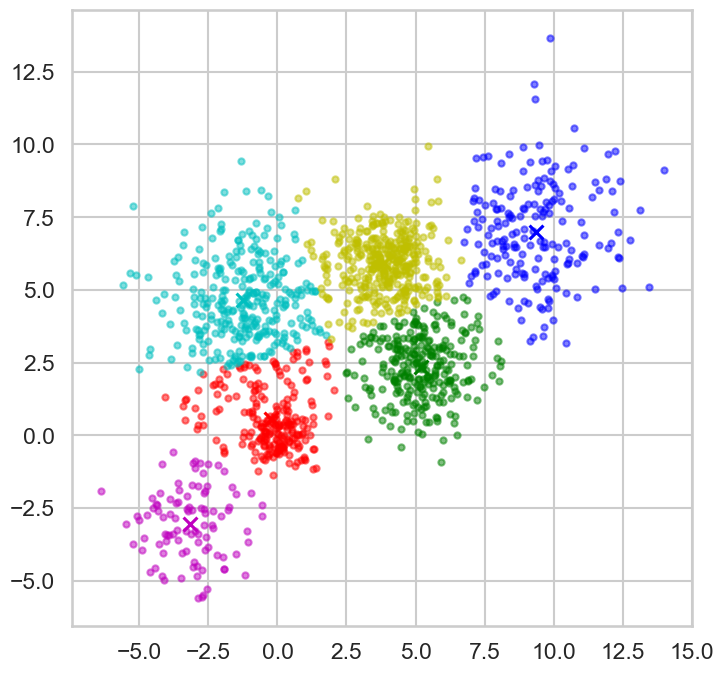

In [ ]:
model = KMeans(n_clusters=6, random_state=42, n_init=10) 
model.fit_predict(Multi_blob_Data)
display_cluster(Multi_blob_Data, model, 6)

In [ ]:
#as we can see from the above plots, the optimal number of clusters is 6 as it has the highest silhouette score and from the graphs we can see that the data is divided into 6 clusters

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s = []
linkage_list = ["average", "single", "complete","ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 10)
distance_thresholds = [None, 5, 10, 15]

best = float('-inf')
best_affinity = ""
best_n = None
best_linkage = ""
best_distance_threshold = None

for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            for dist_threshold in distance_thresholds:
                # Skip invalid combinations
                if linkage == "ward" and affinity != "euclidean":
                    continue  

                # Initialize clustering model
                model = AgglomerativeClustering(
                    n_clusters=n_clusters if dist_threshold is None else None,  # Use n_clusters if threshold is None
                    metric=affinity,
                    linkage=linkage,
                    distance_threshold=dist_threshold
                )
                
                # Fit model
                model.fit(Multi_blob_Data)

                # Compute silhouette score (Only valid if more than 1 cluster is formed)
                if len(set(model.labels_)) > 1:  
                    silhouette = silhouette_score(Multi_blob_Data, model.labels_)
                    s.append(silhouette)

                    print(f"Silhouette Score for {n_clusters} clusters, {affinity} affinity, {linkage} linkage, distance_threshold={dist_threshold}: {silhouette:.4f}")

                    if silhouette > best and n_clusters > 2:
                        best_n = n_clusters
                        best = silhouette
                        best_affinity = affinity
                        best_linkage = linkage
                        best_distance_threshold = dist_threshold

print(f"\nBest model: {best_n} clusters, linkage = {best_linkage}, affinity = {best_affinity}, distance_threshold = {best_distance_threshold}, Silhouette Score = {best:.4f}")


Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=None: 0.4717
Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=5: 0.4332
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=None: 0.3218
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=None: 0.3929
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=5: 0.3046
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=10: 0.3595
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=15: 0.3167
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=None: 0.4702
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=5: 0.3196
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=10: 0.3264
S

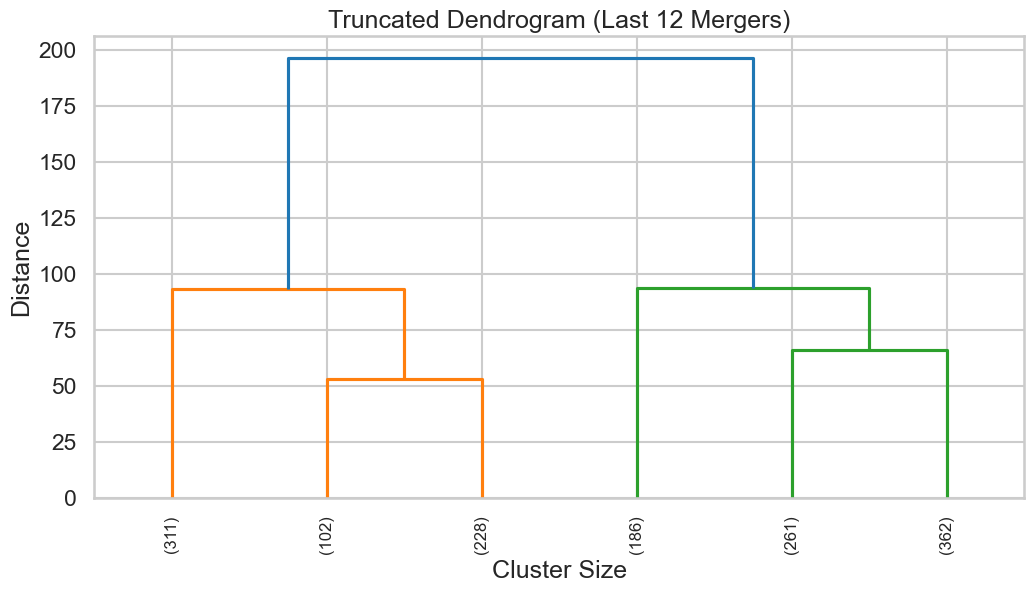

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Correct the metric if it is 'manhattan'
metric = 'cityblock' if best_affinity == 'manhattan' else best_affinity

# Generate the linkage matrix
Z = linkage(Multi_blob_Data, method=best_linkage, metric=metric)

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',  # Focus on the last mergers
    p=6,                   # Show last 12 leaves (adjust as needed)
    show_leaf_counts=True,   # Displays "(N)" for merged leaves
    color_threshold=0.7 * max(Z[:, 2]),  # Colors clusters
    leaf_rotation=90.,
    orientation='top'        # Horizontal layout
)
plt.title("Truncated Dendrogram (Last 12 Mergers)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [ ]:
#Here as we can see in the agglomarative clustering model, the best model is 6 clusters with euclidean affinity, ward linkage and distance threshold of None

### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

Best DBScan parameters: EPS = 2.10, Min_samples = 10, Silhouette Score = 0.4685


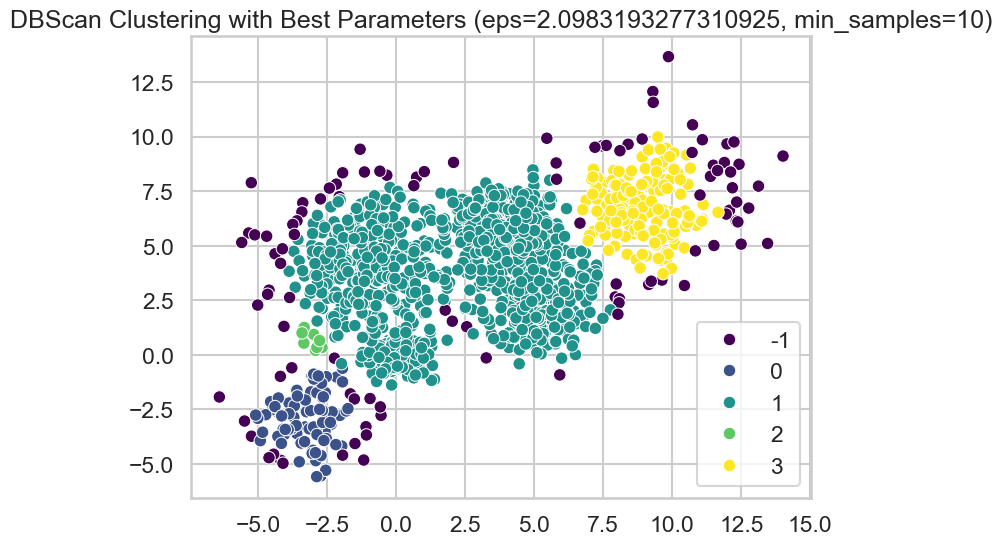

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Use the dataset generated earlier (Multi_blob_Data)
X = Multi_blob_Data  

# Define the range of parameters to test
eps_values = np.linspace(0.1, 3, 120)  
min_samples_values = np.arange(5, 26, 5)  # Vary min_samples from 5 to 25

# Store the best results
best_score = float('-inf')
best_eps = None
best_min_samples = None
silhouette_scores = []


for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

            # Track the best score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


silhouette_scores = np.array(silhouette_scores)


print(f"Best DBScan parameters: EPS = {best_eps:.2f}, Min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")

# 📊 Plot the Best Clustering Result
best_model = DBSCAN(eps=0.75, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.show()


In [ ]:
import numpy as np

def calculate_noise_percentage(labels):
    """
    Calculate the percentage of noise points in DBSCAN results.
    
    Args:
        labels (array-like): Cluster labels from DBSCAN (noise = -1).
    
    Returns:
        float: Percentage of noise points.
    """
    labels = np.array(labels)
    noise_count = np.sum(labels == -1)
    total_points = len(labels)
    noise_percentage = (noise_count / total_points) * 100
    return noise_percentage

# Example usage:
labels = best_labels  # Use the NumPy array directly
noise_pct = calculate_noise_percentage(labels)
print(f"Noise percentage: {noise_pct:.2f}%")


Noise percentage: 7.17%


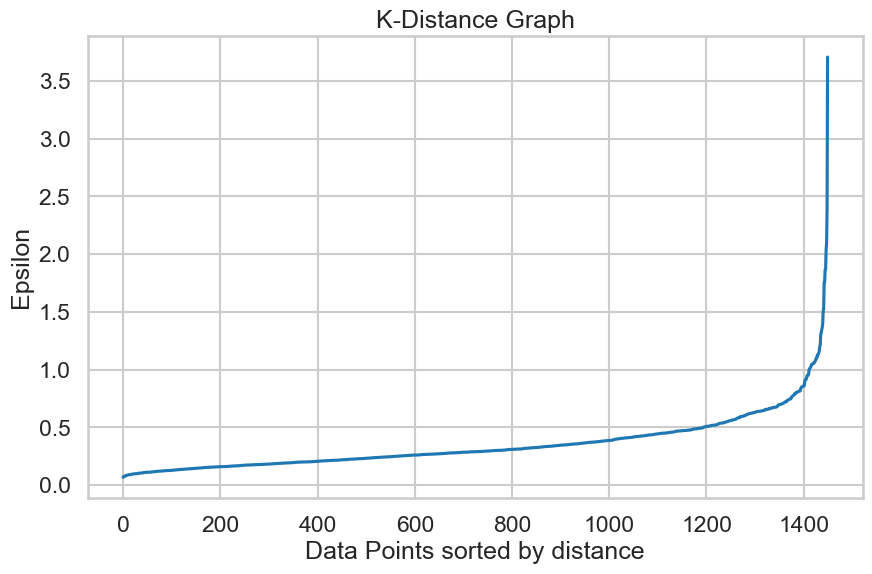

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Compute the k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=9)
neighbors = nearest_neighbors.fit(Multi_blob_Data)
distances, indices = neighbors.kneighbors(Multi_blob_Data)

# Sort the distances (5th column) and plot
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
from kneed import KneeLocator

# Assuming `distances` is your sorted k-distance array
kneedle = KneeLocator(
    x=range(len(distances)),
    y=distances,
    curve='convex',
    direction='increasing'
)
optimal_eps = distances[kneedle.elbow]
print(f"Suggested eps: {optimal_eps:.3f}")

Suggested eps: 1.048


0.3717639801836673
Noise percentage: 2.07%


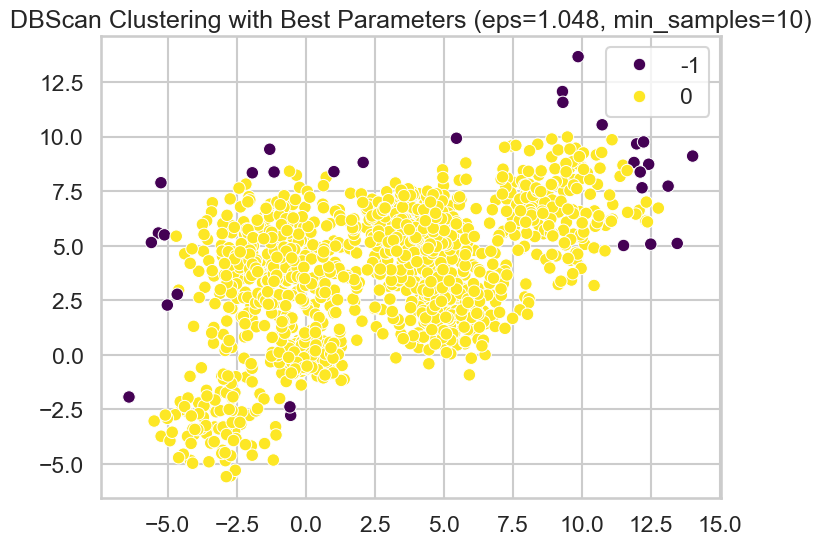

In [ ]:
model = DBSCAN(eps=1.048, min_samples=10)
labels = model.fit_predict(X)

if len(set(labels)) > 1 and -1 in labels:
    score = silhouette_score(X, labels)
print(score)
noise_pct = calculate_noise_percentage(labels)
print(f"Noise percentage: {noise_pct:.2f}%")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps=1.048, min_samples=10)")
plt.show()

In [ ]:
#After running the different clustering methods we can see that the best clustering method is KMeans with 6 clusters as it has the highest silhouette score and the data is divided into 6 clusters.
#The second best clustering method is agglomerative clustering with 6 clusters and euclidean affinity, ward linkage and distance threshold of None

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled = pd.DataFrame(iris_scaled, columns=iris_df.columns)
iris_scaled.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00

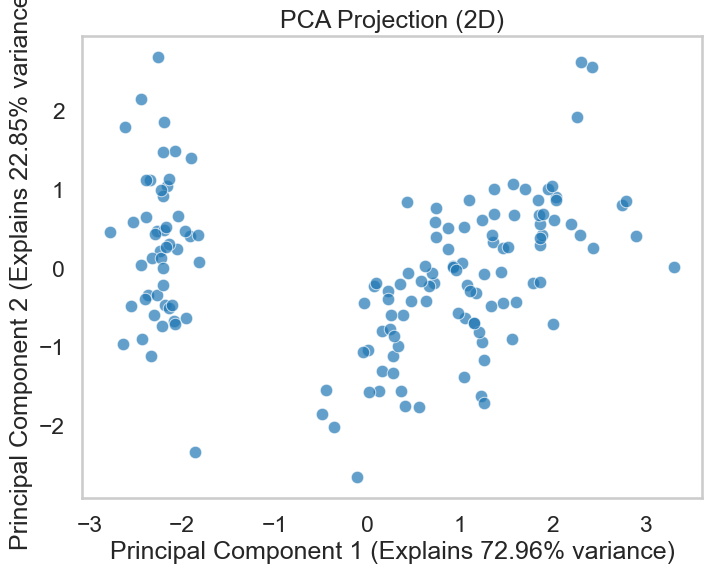

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_scaled)  # X_scaled should be standardized (mean=0, std=1)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1 (Explains {:.2f}% variance)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("Principal Component 2 (Explains {:.2f}% variance)".format(pca.explained_variance_ratio_[1] * 100))
plt.grid()
plt.show()

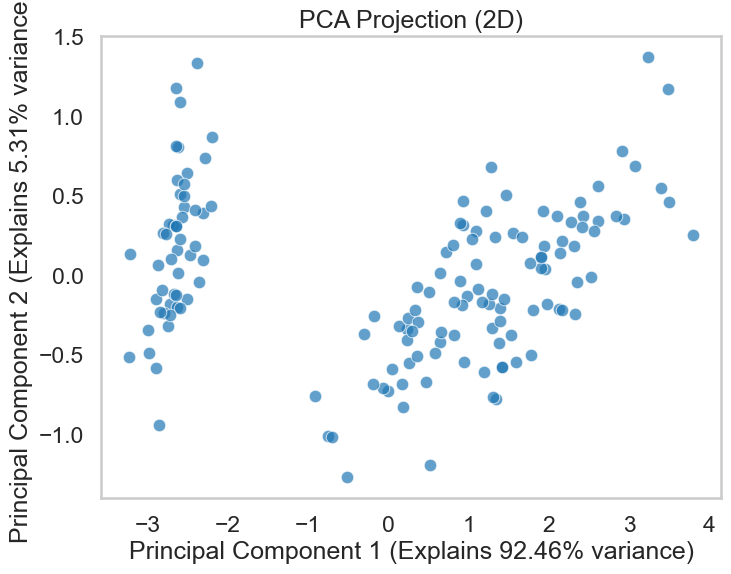

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_data.data)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1 (Explains {:.2f}% variance)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("Principal Component 2 (Explains {:.2f}% variance)".format(pca.explained_variance_ratio_[1] * 100))
plt.grid()
plt.show()

In [ ]:
#After visualizing both PCAs we can see that the PCA with scaled data is more clear and the clusters are more separated than the PCA with unscaled data.
#The PCA with scaled data is better as it has more variance explained and the clusters are more separated.

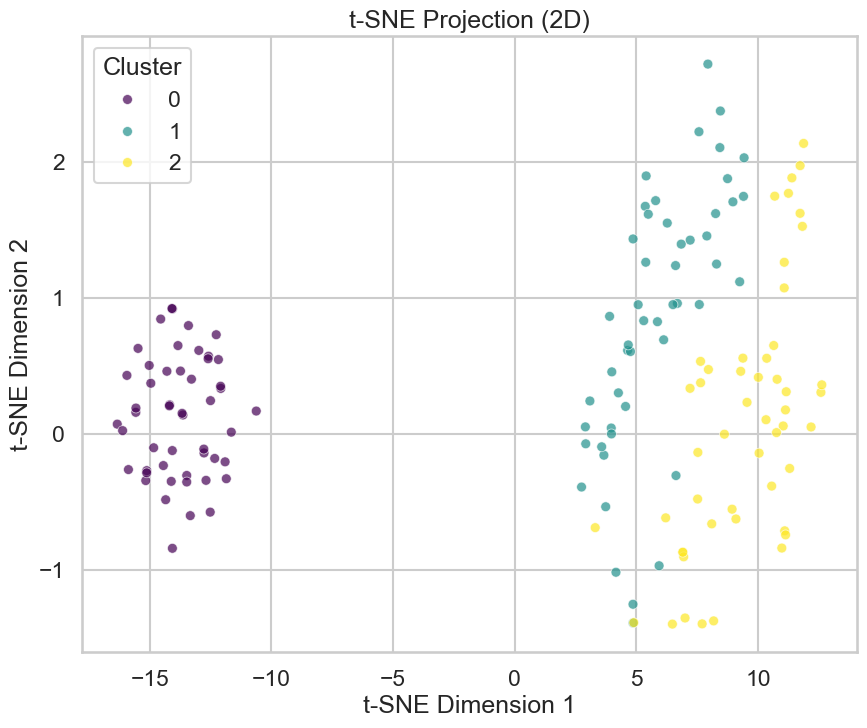

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns



tsne = TSNE(
    n_components=2,      # 2D output
    perplexity=42,       # Balances local/global structure
    random_state=30,     # Reproducibility
    n_iter=1000          # Number of iterations
)
X_tsne = tsne.fit_transform(iris_scaled)  # Use scaled data

# 3. Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1],
    hue=iris_data.target,  # Use the correct labels for the iris dataset
    palette="viridis",     # Color scheme
    alpha=0.7,
    s=50                   # Point size
)
plt.title("t-SNE Projection (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

For k=2:
   SSD (Distortion Function): 152.3480
   Silhouette Score: 0.6810

For k=3:
   SSD (Distortion Function): 78.8514
   Silhouette Score: 0.5528

For k=4:
   SSD (Distortion Function): 57.2285
   Silhouette Score: 0.4981

For k=5:
   SSD (Distortion Function): 46.4612
   Silhouette Score: 0.4912

For k=6:
   SSD (Distortion Function): 39.0400
   Silhouette Score: 0.3648

For k=7:
   SSD (Distortion Function): 34.3058
   Silhouette Score: 0.3543



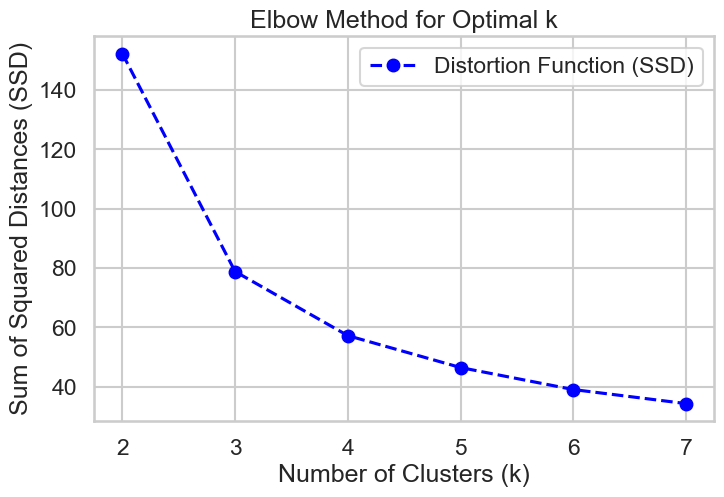

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd2 = []  # Stores the Sum of Squared Distances (SSD)
sil_scoress = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(iris_df)
    
    cluster_labels = model.predict(iris_df)  # Predict clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssd2.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(iris_df, cluster_labels)
    sil_scoress.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd2, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()







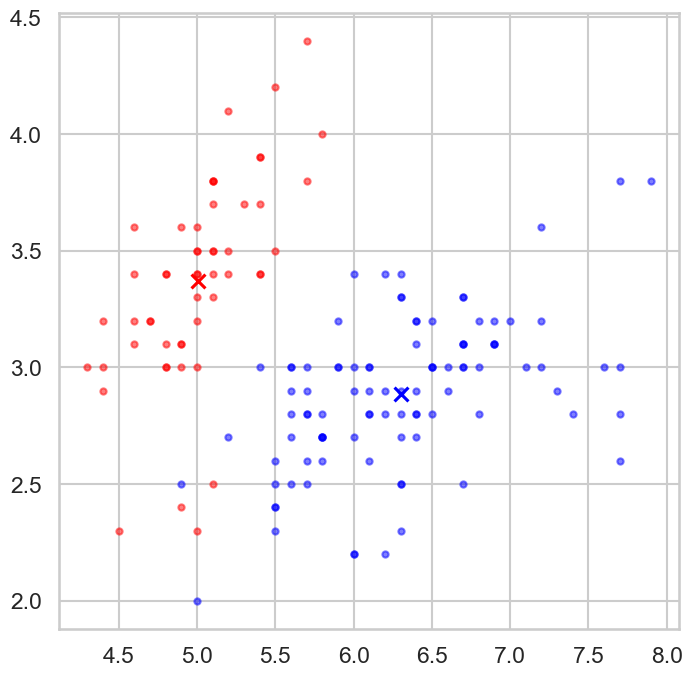

In [ ]:
model = KMeans(n_clusters=2,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_df)
display_cluster(iris_df.values, model, 2)

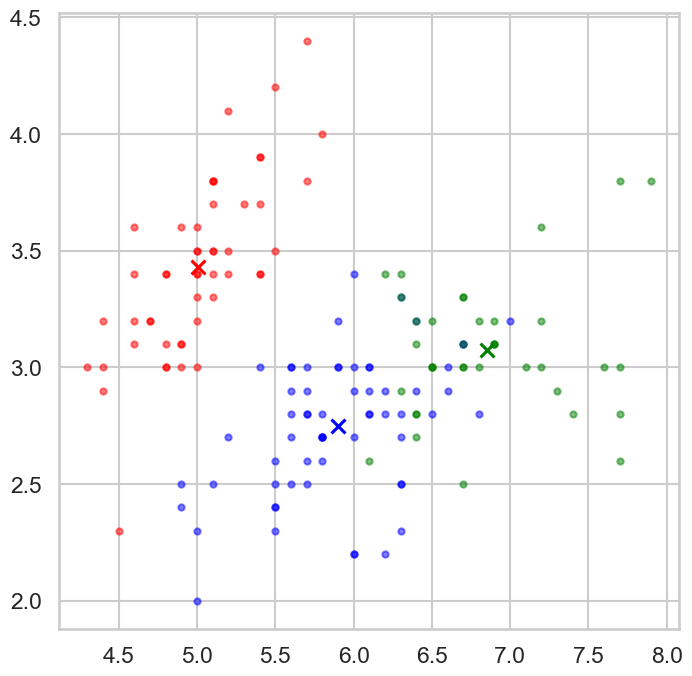

In [ ]:
model = KMeans(n_clusters=3,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_df)
display_cluster(iris_df.values, model, 3)

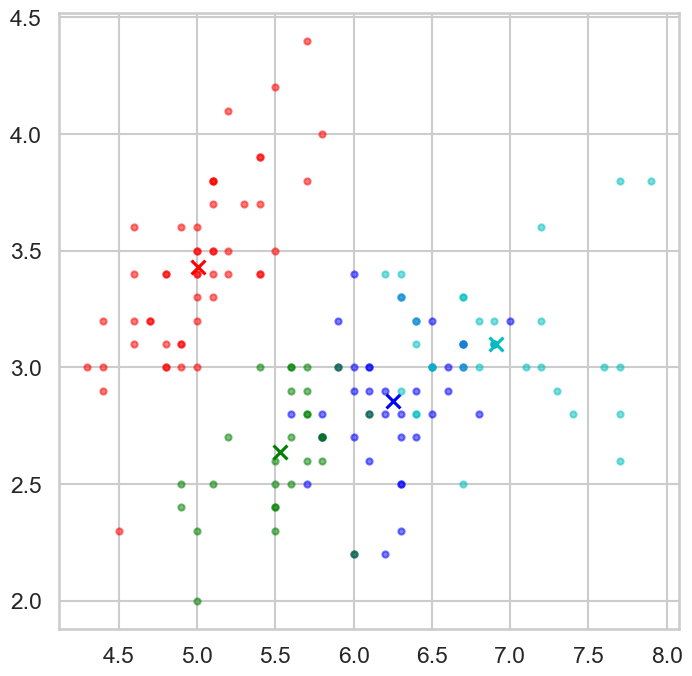

In [ ]:
model = KMeans(n_clusters=4,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_df)
display_cluster(iris_df.values, model, 4)

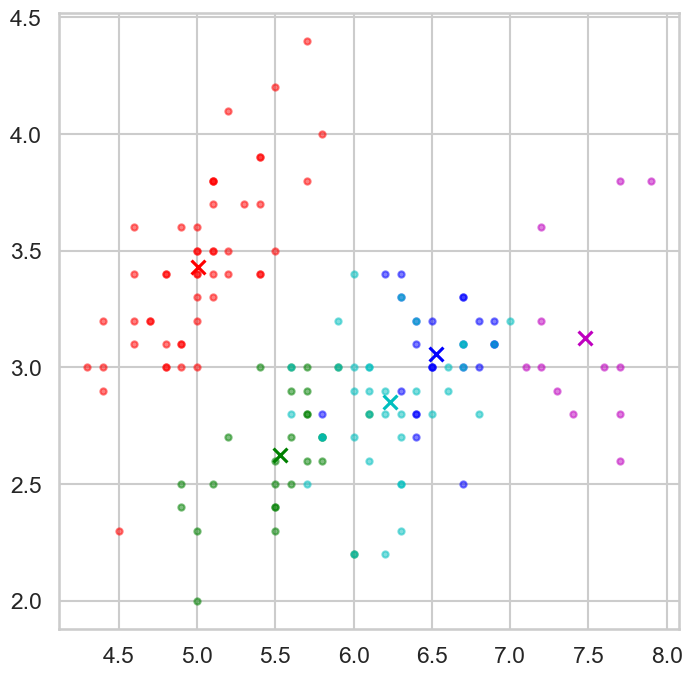

In [ ]:
model = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_df)
display_cluster(iris_df.values, model, 5)

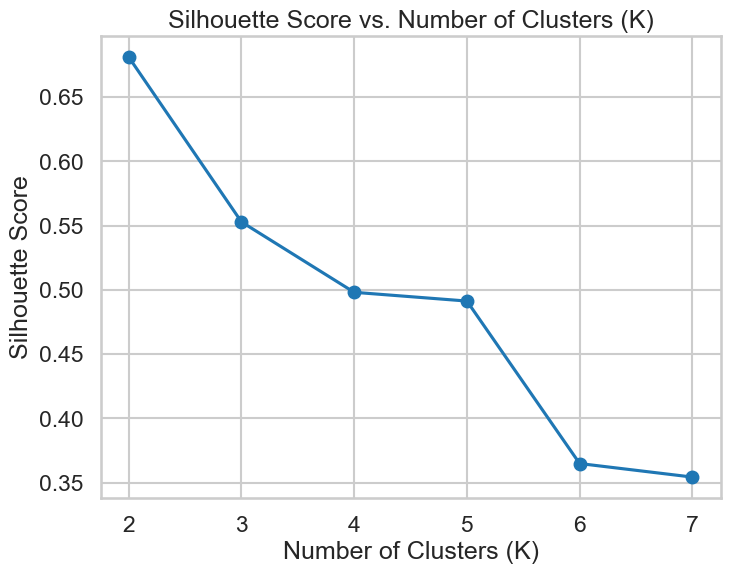

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sil_scoress, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
#Based on the above plots, the optimal number of clusters is 3 as it has the highest silhouette score and from the graphs we can see that the data is divided into 3 clusters

For k=2:
   SSD (Distortion Function): 222.3617
   Silhouette Score: 0.5818

For k=3:
   SSD (Distortion Function): 139.8205
   Silhouette Score: 0.4599

For k=4:
   SSD (Distortion Function): 114.0925
   Silhouette Score: 0.3869

For k=5:
   SSD (Distortion Function): 90.9275
   Silhouette Score: 0.3459

For k=6:
   SSD (Distortion Function): 81.5444
   Silhouette Score: 0.3171

For k=7:
   SSD (Distortion Function): 72.6311
   Silhouette Score: 0.3202



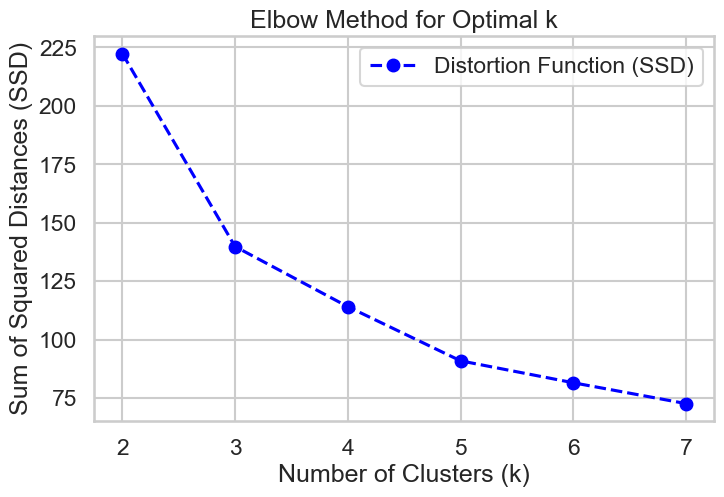

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssds = []  # Stores the Sum of Squared Distances (SSD)
sil_scoress = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(iris_scaled)
    
    cluster_labels = model.predict(iris_scaled)  # Predict clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssds.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(iris_scaled, cluster_labels)
    sil_scoress.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssds, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()







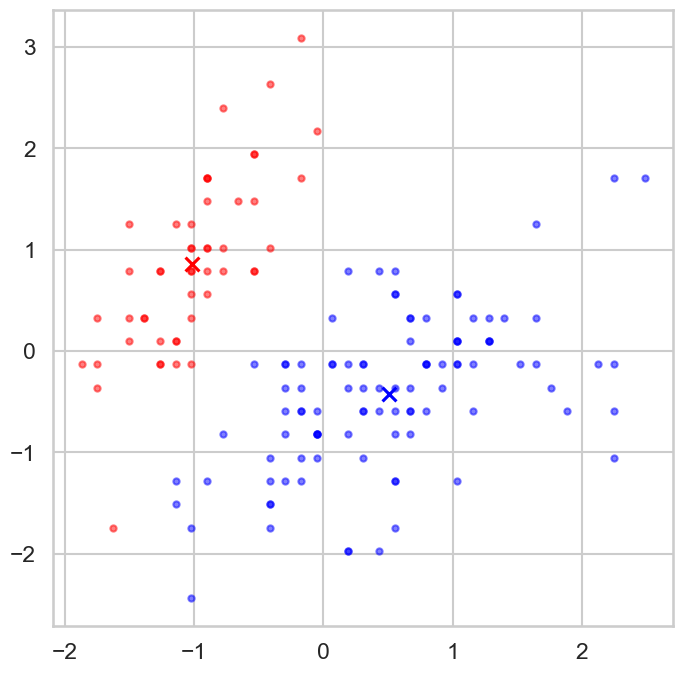

In [ ]:
model = KMeans(n_clusters=2,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_scaled)
display_cluster(iris_scaled.values, model, 2)

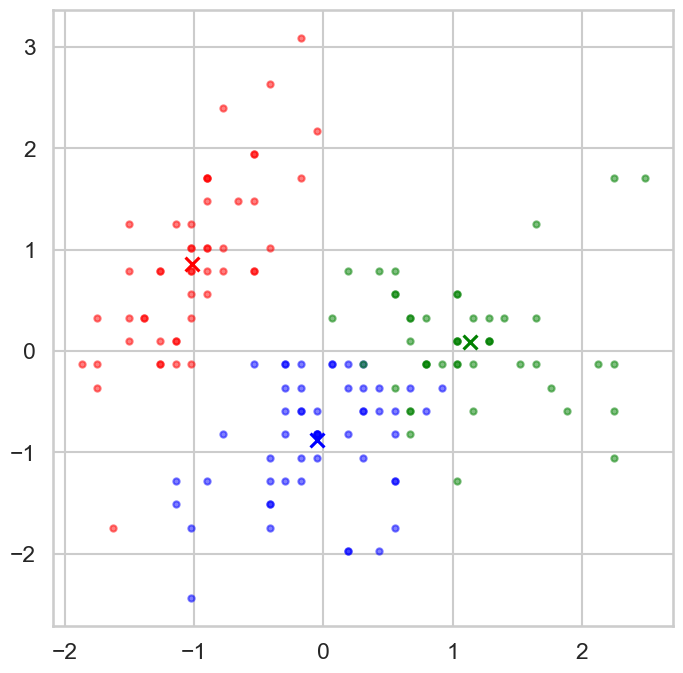

In [ ]:
model = KMeans(n_clusters=3,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_scaled)
display_cluster(iris_scaled.values, model, 3)

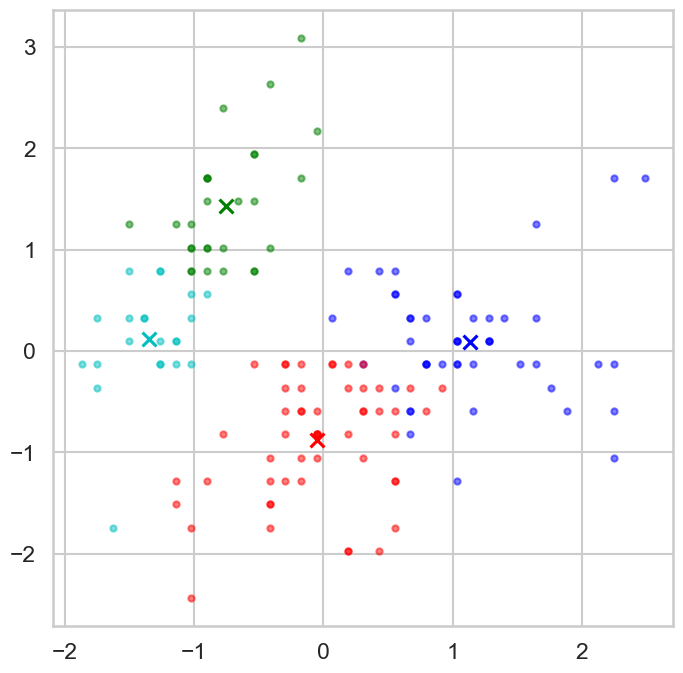

In [ ]:
model = KMeans(n_clusters=4,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_scaled)
display_cluster(iris_scaled.values, model, 4)

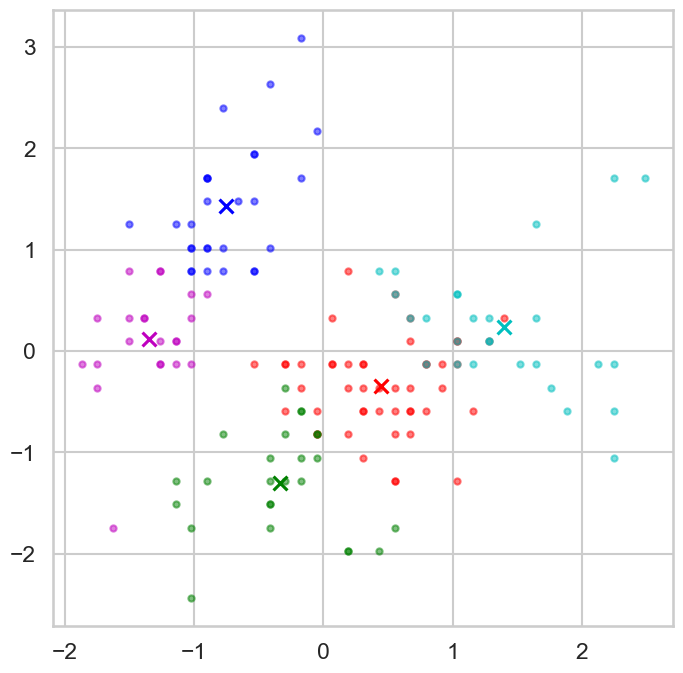

In [ ]:
model = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(iris_scaled)
display_cluster(iris_scaled.values, model, 5)

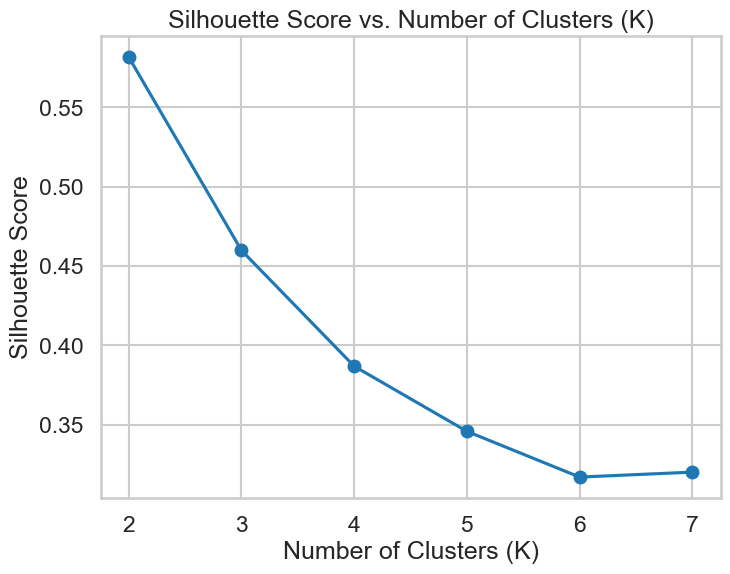

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sil_scoress, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

For k=2:
   SSD (Distortion Function): 137.1553
   Silhouette Score: 0.7057

For k=3:
   SSD (Distortion Function): 63.8199
   Silhouette Score: 0.5977

For k=4:
   SSD (Distortion Function): 42.2252
   Silhouette Score: 0.5577

For k=5:
   SSD (Distortion Function): 33.4802
   Silhouette Score: 0.5516

For k=6:
   SSD (Distortion Function): 26.1549
   Silhouette Score: 0.4428

For k=7:
   SSD (Distortion Function): 22.0409
   Silhouette Score: 0.4335



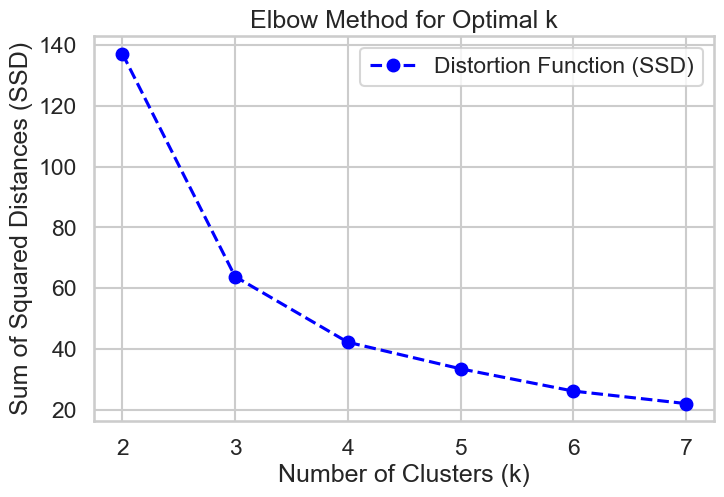

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssds = []  # Stores the Sum of Squared Distances (SSD)
sil_scoress = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(X_pca)
    
    cluster_labels = model.predict(X_pca)  # Predict clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssds.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(X_pca, cluster_labels)
    sil_scoress.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssds, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()







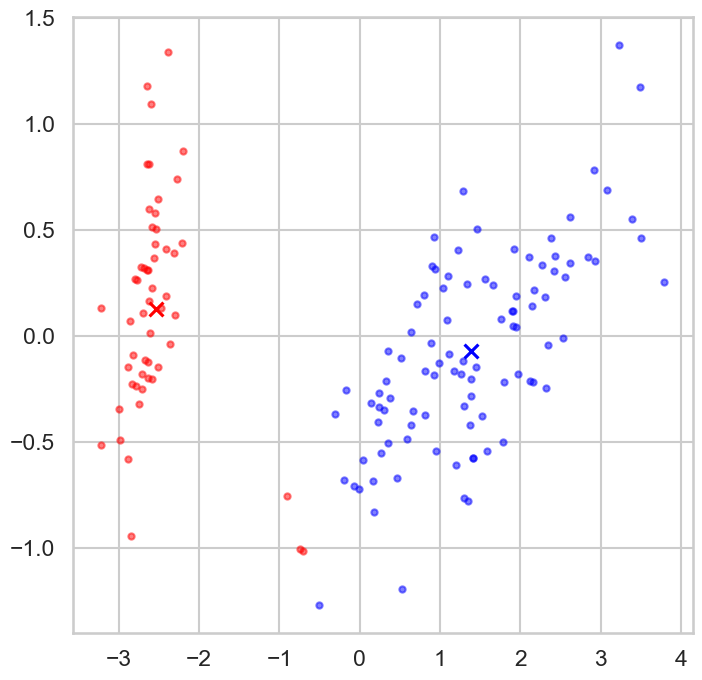

In [ ]:
model = KMeans(n_clusters=2,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 2)

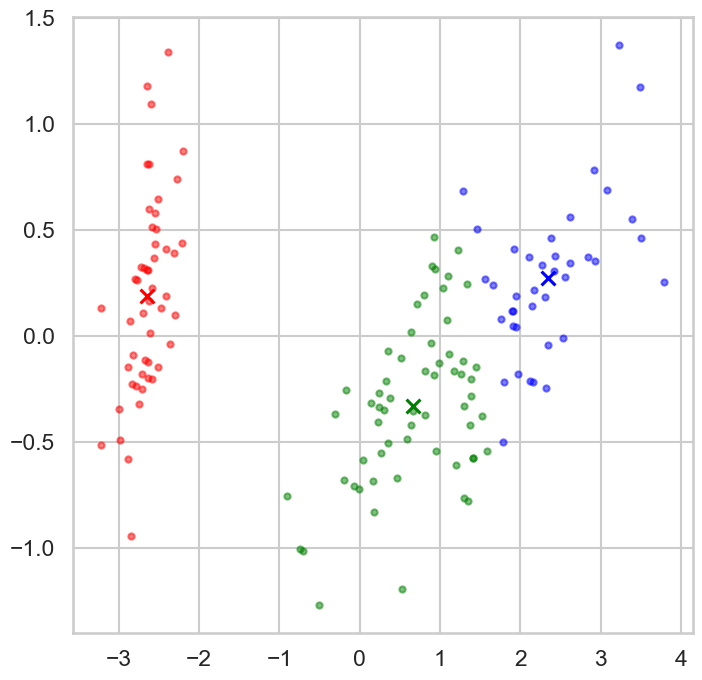

In [ ]:
model = KMeans(n_clusters=3,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 3)

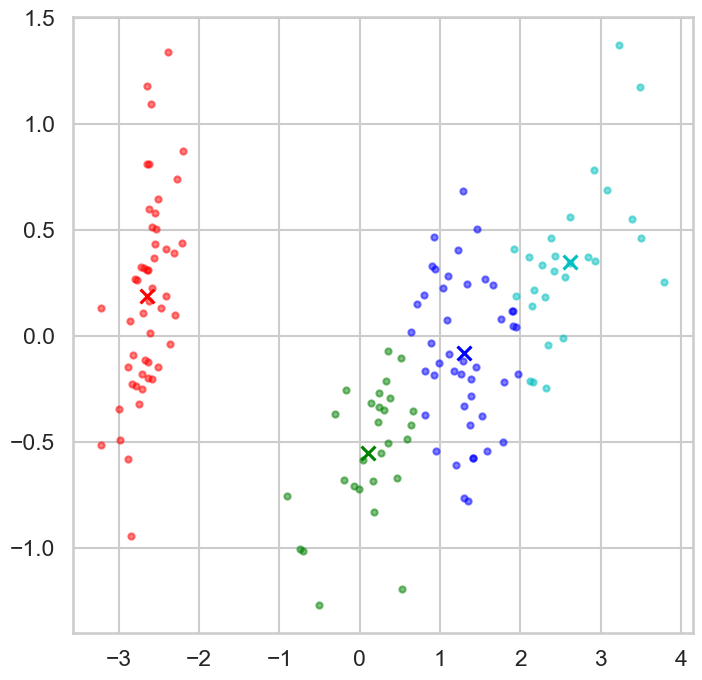

In [ ]:
model = KMeans(n_clusters=4,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 4)

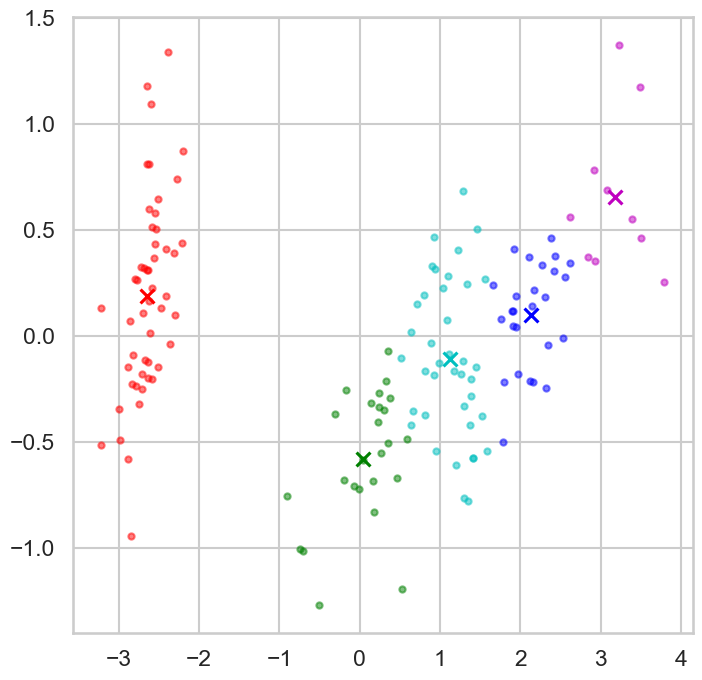

In [ ]:
model = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 5)

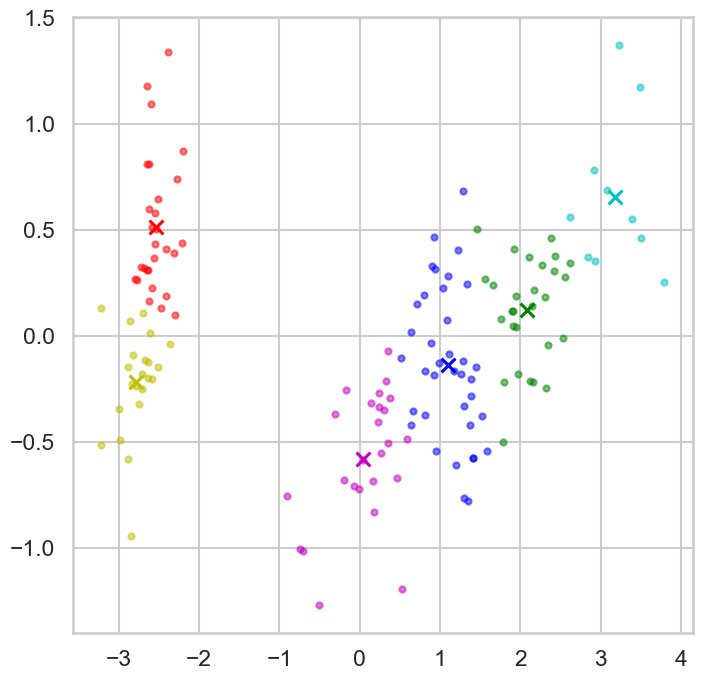

In [ ]:
model = KMeans(n_clusters=6,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 6)

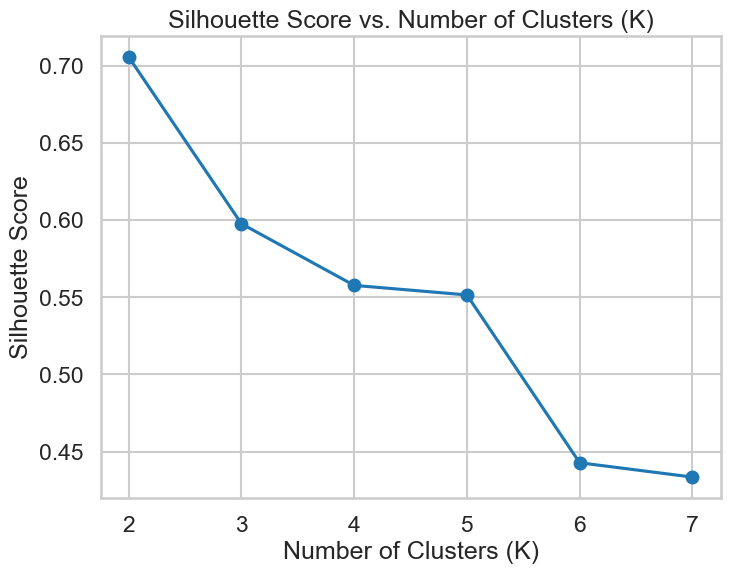

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sil_scoress, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
from kneed import KneeLocator  
kneedle = KneeLocator(  
    x=range(2, 8),                      # k values  
    y=[sil_scoress[0], sil_scoress[1], sil_scoress[2],sil_scoress[3],sil_scoress[4],sil_scoress[5]], 
    curve='convex',  
    direction='decreasing'  
)  
optimal_k = kneedle.elbow  
print(f"Optimal k: {optimal_k}") 

Optimal k: 3


In [ ]:
from kneed import KneeLocator  
kneedle = KneeLocator(  
    x=range(2, 8),                      # k values  
    y=[ssd[0], ssd[1], ssd[2],ssd[3],ssd[4],ssd[5]],    # SSD values  
    curve='convex',  
    direction='decreasing'  
)  
optimal_k = kneedle.elbow  
print(f"Optimal k: {optimal_k}") 

Optimal k: 4


In [ ]:
# As we can see from the above graphs the optimal k in the ssd graph is 4 and in the silhouette score graph is 3 as well and also there isn't much difference between the two graphs so we can say that the optimal k is 4 and we can also that the x_pca got the best clustering method as it has the highest silhouette score and the data is divided into 4 clusters.

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s = []
linkage_list = ["average", "single", "complete","ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 10)
distance_thresholds = [None, 5, 10, 15]

best = float('-inf')
best_affinity = ""
best_n = None
best_linkage = ""
best_distance_threshold = None

for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            for dist_threshold in distance_thresholds:
                # Skip invalid combinations
                if linkage == "ward" and affinity != "euclidean":
                    continue  

                # Initialize clustering model
                model = AgglomerativeClustering(
                    n_clusters=n_clusters if dist_threshold is None else None,  # Use n_clusters if threshold is None
                    metric=affinity,
                    linkage=linkage,
                    distance_threshold=dist_threshold
                )
                
                # Fit model
                model.fit(iris_scaled)

                # Compute silhouette score (Only valid if more than 1 cluster is formed)
                if len(set(model.labels_)) > 1:  
                    silhouette = silhouette_score(iris_scaled, model.labels_)
                    s.append(silhouette)

                    print(f"Silhouette Score for {n_clusters} clusters, {affinity} affinity, {linkage} linkage, distance_threshold={dist_threshold}: {silhouette:.4f}")

                    if silhouette > best and n_clusters > 2:
                        best_n = n_clusters
                        best = silhouette
                        best_affinity = affinity
                        best_linkage = linkage
                        best_distance_threshold = dist_threshold

print(f"\nBest model: {best_n} clusters, linkage = {best_linkage}, affinity = {best_affinity}, distance_threshold = {best_distance_threshold}, Silhouette Score = {best:.4f}")


Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=None: 0.5818
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=None: 0.5818
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=None: 0.4408
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=5: 0.4496
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=None: 0.5770
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=5: 0.3306
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=10: 0.4467
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=15: 0.5770
Silhouette Score for 2 clusters, manhattan affinity, average linkage, distance_threshold=None: 0.5818
Silhouette Score for 2 clusters, manhattan affinity, average linkage, distance_threshold=5: 0.5818
Silh

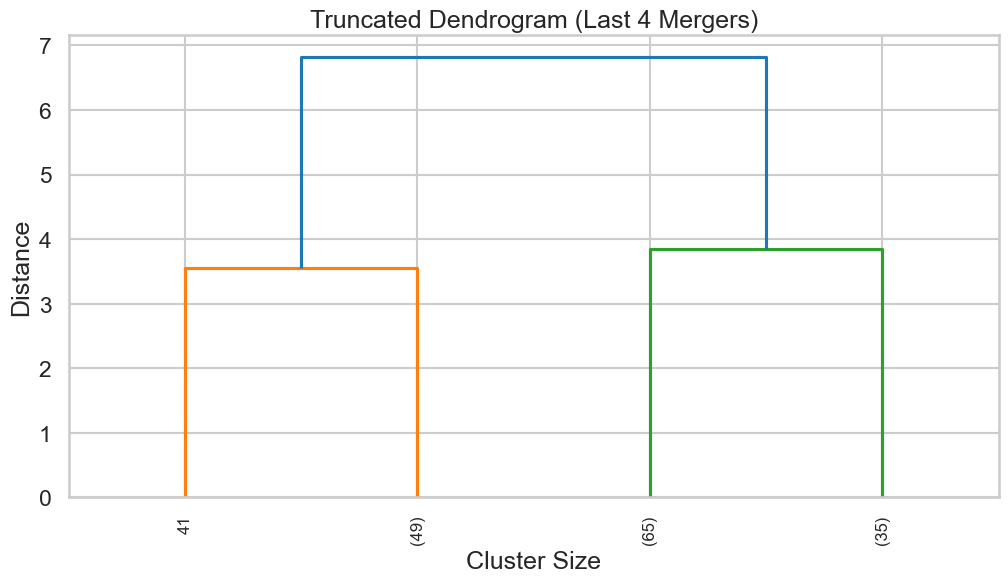

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Correct the metric if it is 'manhattan'
metric = 'cityblock' if best_affinity == 'manhattan' else best_affinity

# Generate the linkage matrix
Z = linkage(iris_scaled, method=best_linkage, metric=metric)

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',  # Focus on the last mergers
    p=4,                   # Show last 12 leaves (adjust as needed)
    show_leaf_counts=True,   # Displays "(N)" for merged leaves
    color_threshold=0.7 * max(Z[:, 2]),  # Colors clusters
    leaf_rotation=90.,
    orientation='top'        # Horizontal layout
)
plt.title("Truncated Dendrogram (Last 4 Mergers)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s = []
linkage_list = ["average", "single", "complete","ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 10)
distance_thresholds = [None, 5, 10, 15]

best = float('-inf')
best_affinity = ""
best_n = None
best_linkage = ""
best_distance_threshold = None

for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            for dist_threshold in distance_thresholds:
                # Skip invalid combinations
                if linkage == "ward" and affinity != "euclidean":
                    continue  

                # Initialize clustering model
                model = AgglomerativeClustering(
                    n_clusters=n_clusters if dist_threshold is None else None,  # Use n_clusters if threshold is None
                    metric=affinity,
                    linkage=linkage,
                    distance_threshold=dist_threshold
                )
                
                # Fit model
                model.fit(iris_df)

                # Compute silhouette score (Only valid if more than 1 cluster is formed)
                if len(set(model.labels_)) > 1:  
                    silhouette = silhouette_score(iris_df, model.labels_)
                    s.append(silhouette)

                    print(f"Silhouette Score for {n_clusters} clusters, {affinity} affinity, {linkage} linkage, distance_threshold={dist_threshold}: {silhouette:.4f}")

                    if silhouette > best and n_clusters > 2:
                        best_n = n_clusters
                        best = silhouette
                        best_affinity = affinity
                        best_linkage = linkage
                        best_distance_threshold = dist_threshold

print(f"\nBest model: {best_n} clusters, linkage = {best_linkage}, affinity = {best_affinity}, distance_threshold = {best_distance_threshold}, Silhouette Score = {best:.4f}")


Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=None: 0.6867
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=None: 0.6867
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=None: 0.5160
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=5: 0.5160
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=None: 0.6867
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=5: 0.4890
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=10: 0.5543
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=15: 0.6867
Silhouette Score for 2 clusters, manhattan affinity, average linkage, distance_threshold=None: 0.6867
Silhouette Score for 2 clusters, manhattan affinity, average linkage, distance_threshold=5: 0.6867
Silh

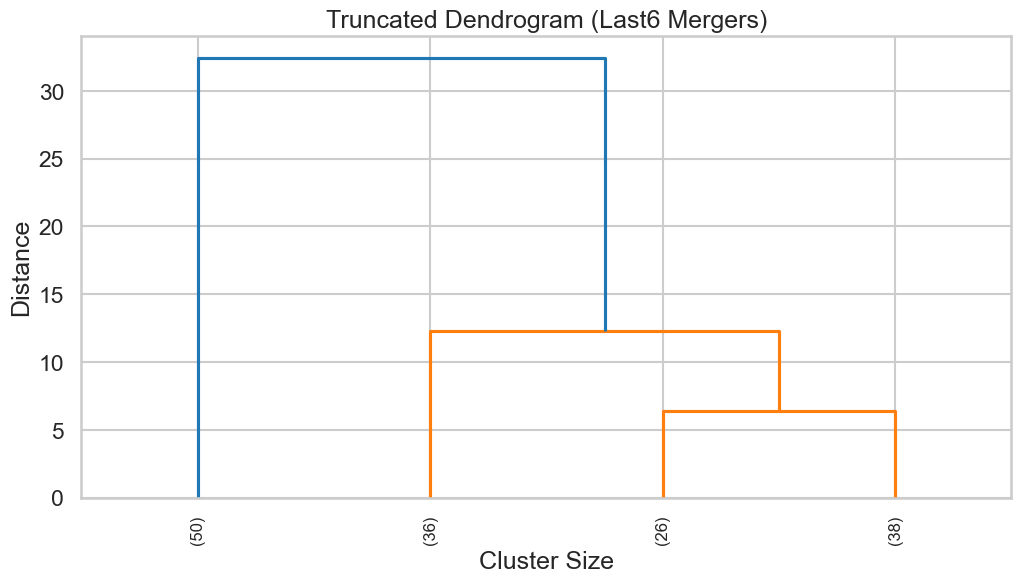

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Correct the metric if it is 'manhattan'
metric = 'cityblock' if best_affinity == 'manhattan' else best_affinity

# Generate the linkage matrix
Z = linkage(iris_df, method=best_linkage, metric=metric)

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',  # Focus on the last mergers
    p=4,                   # Show last 12 leaves (adjust as needed)
    show_leaf_counts=True,   # Displays "(N)" for merged leaves
    color_threshold=0.7 * max(Z[:, 2]),  # Colors clusters
    leaf_rotation=90.,
    orientation='top'        # Horizontal layout
)
plt.title("Truncated Dendrogram (Last6 Mergers)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s = []
linkage_list = ["average", "single", "complete","ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 10)
distance_thresholds = [None, 5, 10, 15]

best = float('-inf')
best_affinity = ""
best_n = None
best_linkage = ""
best_distance_threshold = None

for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            for dist_threshold in distance_thresholds:
                # Skip invalid combinations
                if linkage == "ward" and affinity != "euclidean":
                    continue  

                # Initialize clustering model
                model = AgglomerativeClustering(
                    n_clusters=n_clusters if dist_threshold is None else None,  # Use n_clusters if threshold is None
                    metric=affinity,
                    linkage=linkage,
                    distance_threshold=dist_threshold
                )
                
                # Fit model
                model.fit(X_pca)

                # Compute silhouette score (Only valid if more than 1 cluster is formed)
                if len(set(model.labels_)) > 1:  
                    silhouette = silhouette_score(X_pca, model.labels_)
                    s.append(silhouette)

                    print(f"Silhouette Score for {n_clusters} clusters, {affinity} affinity, {linkage} linkage, distance_threshold={dist_threshold}: {silhouette:.4f}")

                    if silhouette > best and n_clusters > 2:
                        best_n = n_clusters
                        best = silhouette
                        best_affinity = affinity
                        best_linkage = linkage
                        best_distance_threshold = dist_threshold

print(f"\nBest model: {best_n} clusters, linkage = {best_linkage}, affinity = {best_affinity}, distance_threshold = {best_distance_threshold}, Silhouette Score = {best:.4f}")


Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=None: 0.7112
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=None: 0.7112
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=None: 0.4740
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=5: 0.4740
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=None: 0.7112
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=5: 0.5410
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=10: 0.5985
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=15: 0.7112
Silhouette Score for 2 clusters, manhattan affinity, average linkage, distance_threshold=None: 0.7112
Silhouette Score for 2 clusters, manhattan affinity, single linkage, distance_threshold=None: 0.7112
Si

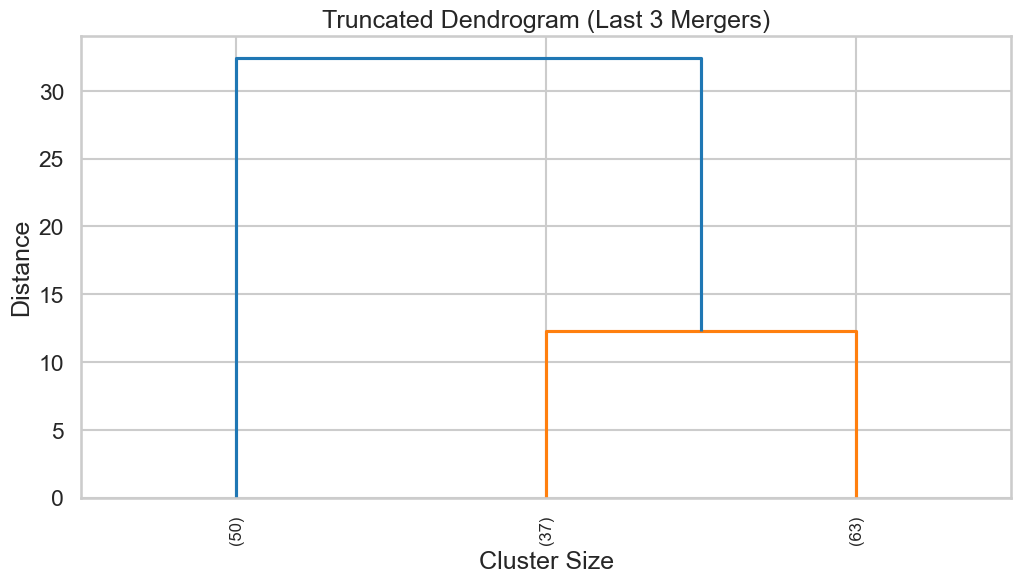

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Correct the metric if it is 'manhattan'
metric = 'cityblock' if best_affinity == 'manhattan' else best_affinity

# Generate the linkage matrix
Z = linkage(X_pca, method=best_linkage, metric=metric)

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',  # Focus on the last mergers
    p=3,                   # Show last 12 leaves (adjust as needed)
    show_leaf_counts=True,   # Displays "(N)" for merged leaves
    color_threshold=0.7 * max(Z[:, 2]),  # Colors clusters
    leaf_rotation=90.,
    orientation='top'        # Horizontal layout
)
plt.title("Truncated Dendrogram (Last 3 Mergers)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

Best DBScan parameters: EPS = 0.59, Min_samples = 25, Silhouette Score = 0.6604


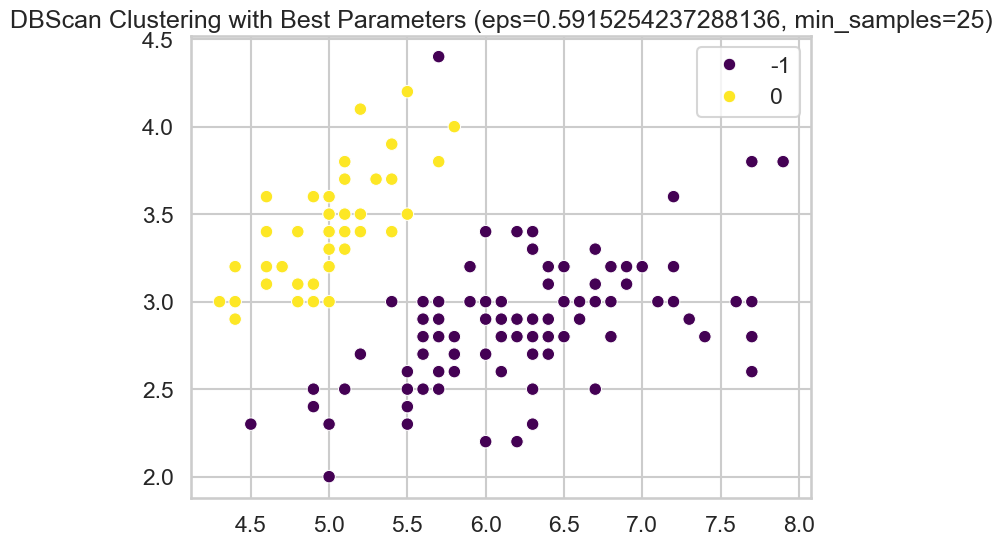

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Use the dataset generated earlier (Multi_blob_Data)
X = iris_df.values  # Convert DataFrame to NumPy array

# Define the range of parameters to test
eps_values = np.linspace(0.1, 3, 60)   
min_samples_values = np.arange(5, 26, 5)  # Vary min_samples from 5 to 25

# Store the best results
best_score = float('-inf')
best_eps = None
best_min_samples = None
silhouette_scores = []


for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

            # Track the best score
            if score > best_score and len(set(labels)) > 1:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


silhouette_scores = np.array(silhouette_scores)


print(f"Best DBScan parameters: EPS = {best_eps:.2f}, Min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")


best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.show()


Best DBScan parameters: EPS = 1.08, Min_samples = 5, Silhouette Score = 0.5518


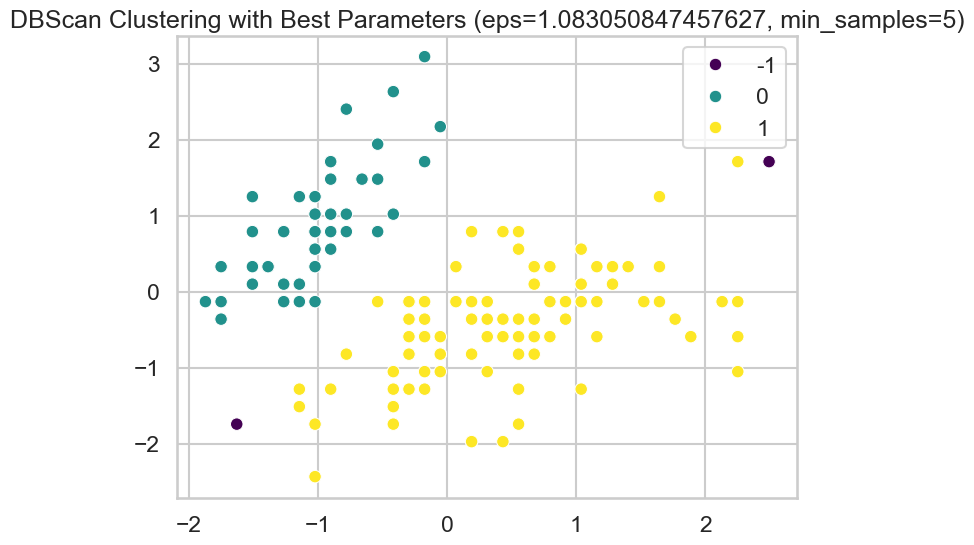

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Use the dataset generated earlier (Multi_blob_Data)
X = iris_scaled.values 

# Define the range of parameters to test
eps_values = np.linspace(0.1, 3, 60)  
min_samples_values = np.arange(5, 26, 5)  # Vary min_samples from 5 to 25

# Store the best results
best_score = float('-inf')
best_eps = None
best_min_samples = None
silhouette_scores = []


for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

            # Track the best score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


silhouette_scores = np.array(silhouette_scores)


print(f"Best DBScan parameters: EPS = {best_eps:.2f}, Min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")

# 📊 Plot the Best Clustering Result
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.show()


* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

Best DBScan parameters: EPS = 0.50, Min_samples = 10, Silhouette Score = 0.5913


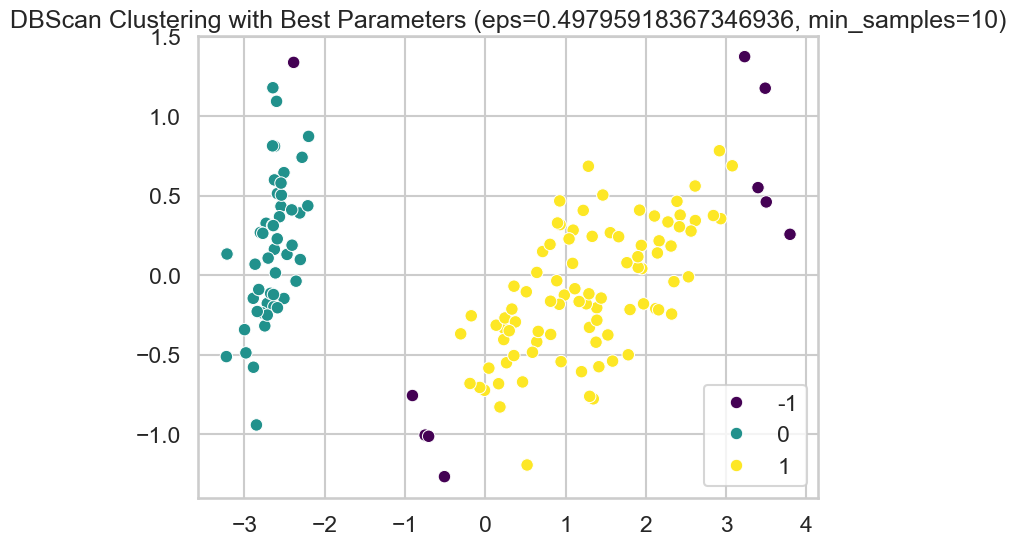

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Use the dataset generated earlier (Multi_blob_Data)
X = X_pca

# Define the range of parameters to test
eps_values = np.linspace(0.1, 4, 50)  
min_samples_values = np.arange(5, 26, 5)  # Vary min_samples from 5 to 25

# Store the best results
best_score = float('-inf')
best_eps = None
best_min_samples = None
silhouette_scores = []


for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

            # Track the best score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


silhouette_scores = np.array(silhouette_scores)


print(f"Best DBScan parameters: EPS = {best_eps:.2f}, Min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")

# 📊 Plot the Best Clustering Result
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.show()


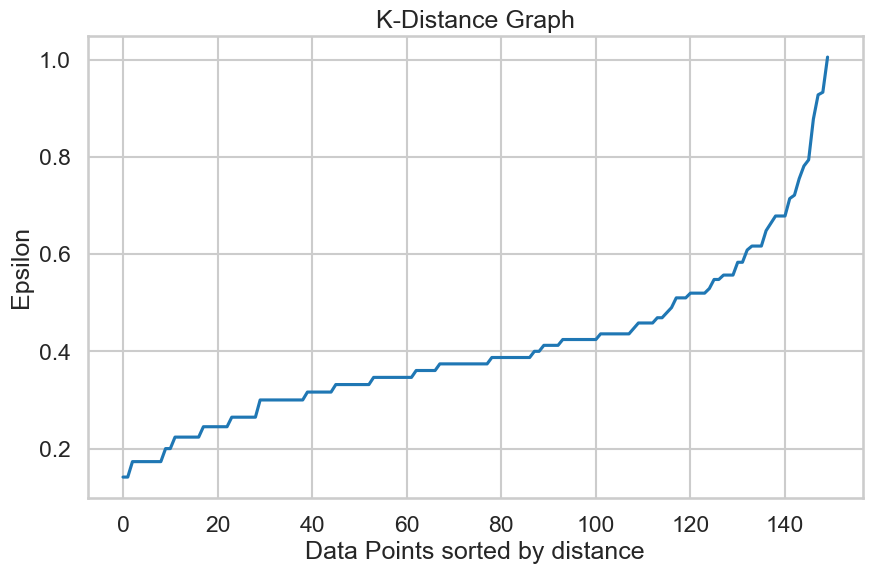

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Compute the k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=24)
neighbors = nearest_neighbors.fit(iris_df)
distances, indices = neighbors.kneighbors(iris_df)

# Sort the distances (5th column) and plot
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

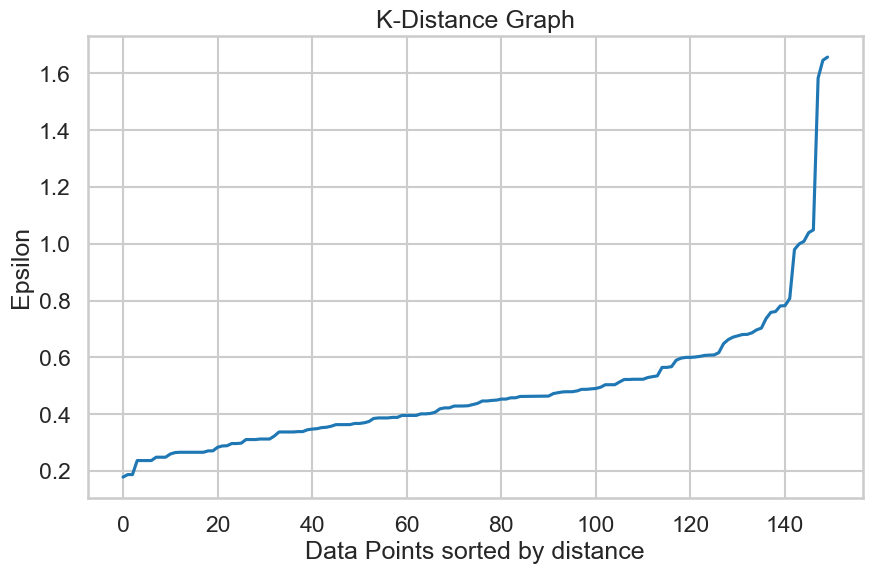

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Compute the k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(iris_scaled)
distances, indices = neighbors.kneighbors(iris_scaled)

# Sort the distances (5th column) and plot
distances = np.sort(distances[:, -1], axis=0)  # Use the last column dynamically
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

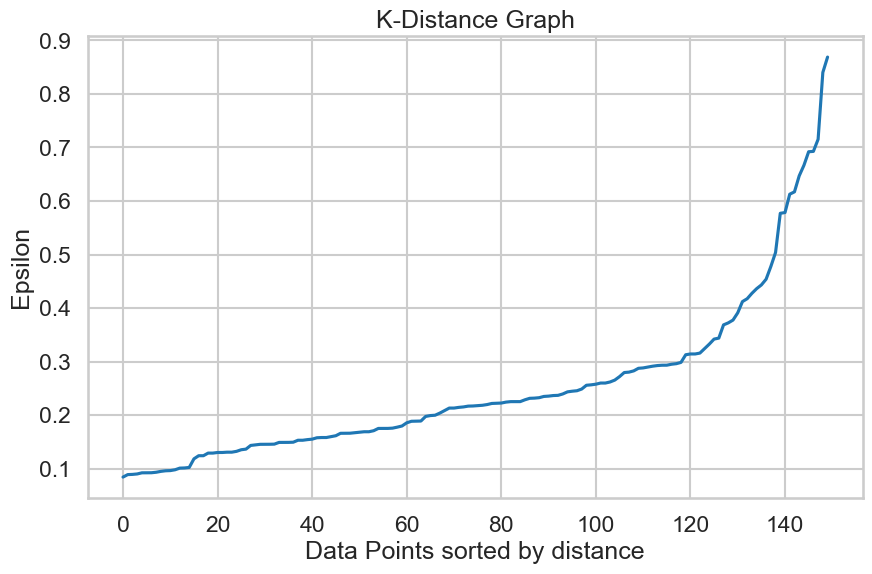

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Compute the k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)

# Sort the distances (5th column) and plot
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
# As we can see from both plots scaling the data changed the epsilon value and the number of clusters to be better than the unscaled data as 2 clusters were found in the scaled data and 3 clusters were found in the unscaled data while only 1 cluster was found in the unscaled data which is very unreasonable
# and also the pca plot is more clear and the clusters are more separated than the PCA with unscaled data. and it also yelds a better silhouette score than the unscaled data.

## Customer dataset
Repeat all the above on the customer data set 

In [4]:
customer_data = pd.read_csv('Customer data.csv')
customer_data.head()


ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

For k=2:
   SSD (Distortion Function): 1215199137490.1978
   Silhouette Score: 0.5828

For k=3:
   SSD (Distortion Function): 673656873449.2950
   Silhouette Score: 0.5104

For k=4:
   SSD (Distortion Function): 377724845221.6508
   Silhouette Score: 0.5411

For k=5:
   SSD (Distortion Function): 249559669058.7105
   Silhouette Score: 0.5379

For k=6:
   SSD (Distortion Function): 177220364917.7485
   Silhouette Score: 0.5396

For k=7:
   SSD (Distortion Function): 130106103047.2623
   Silhouette Score: 0.5274



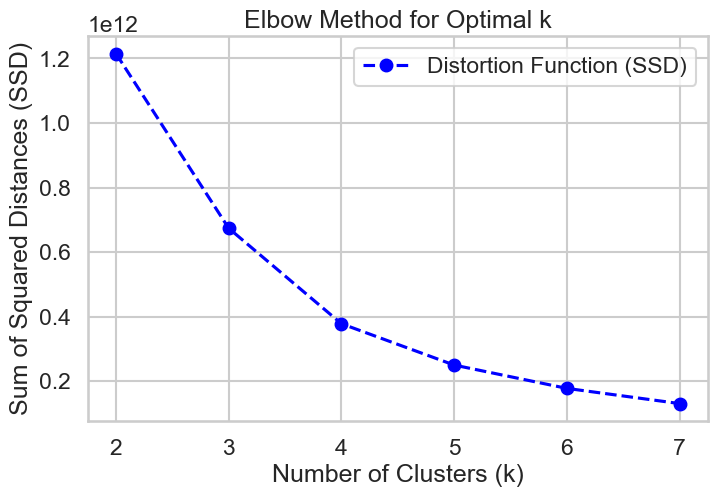

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []  # Stores the Sum of Squared Distances (SSD)
sil_scores = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(customer_data)
    
    cluster_labels = model.predict(customer_data)  # Predict clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssd.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(customer_data, cluster_labels)
    sil_scores.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()






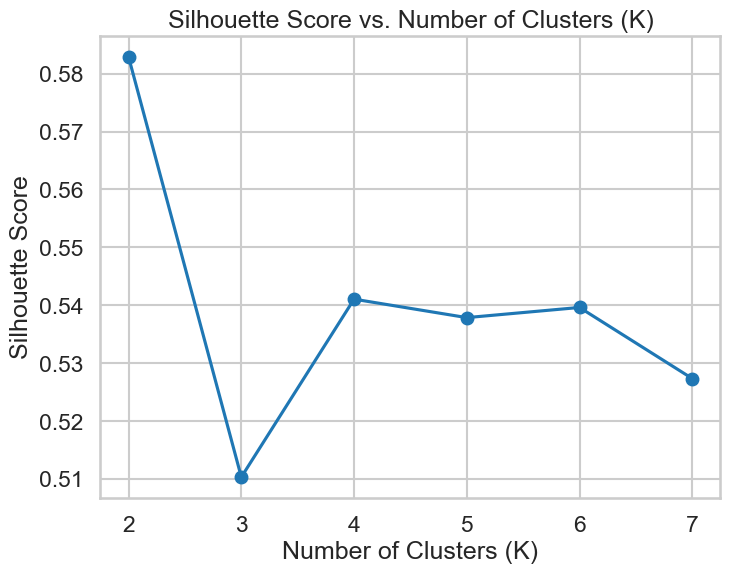

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [7]:
customer_scaled = scaler.fit_transform(customer_data)



NameError: name 'scaler' is not defined

For k=2:
   SSD (Distortion Function): 12066.1461
   Silhouette Score: 0.2341

For k=3:
   SSD (Distortion Function): 10195.7762
   Silhouette Score: 0.2444

For k=4:
   SSD (Distortion Function): 8805.3081
   Silhouette Score: 0.2347

For k=5:
   SSD (Distortion Function): 7871.8537
   Silhouette Score: 0.2262

For k=6:
   SSD (Distortion Function): 7258.5724
   Silhouette Score: 0.2345

For k=7:
   SSD (Distortion Function): 6780.3497
   Silhouette Score: 0.2301



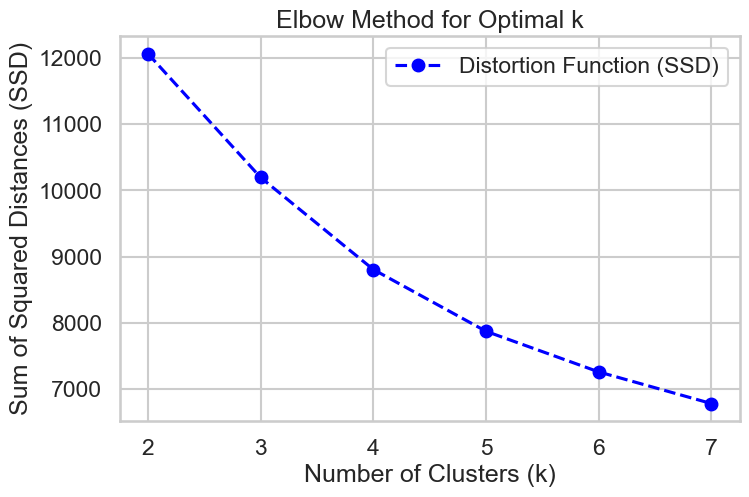

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []  # Stores the Sum of Squared Distances (SSD)
sil_scores = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(customer_scaled)
    
    cluster_labels = model.predict(customer_scaled)  # Predict clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssd.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(customer_scaled, cluster_labels)
    sil_scores.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()






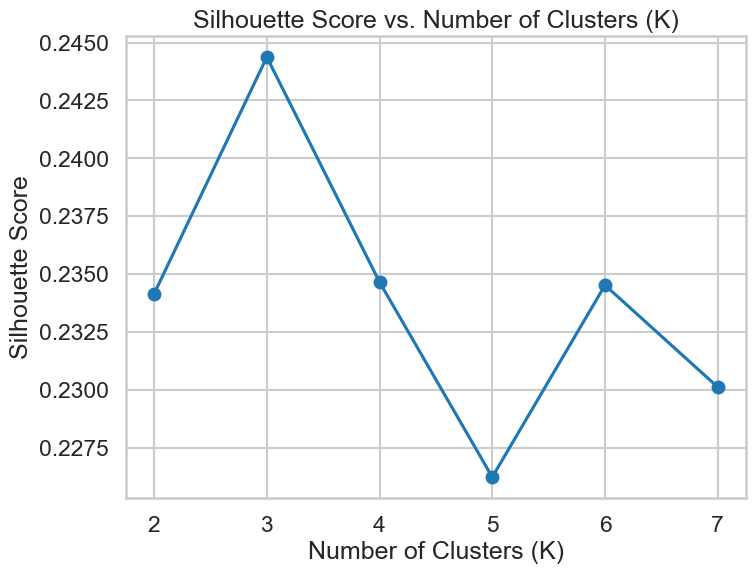

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
#As we can see here scaling the data made the silhouette score worse, so we will use the original data for clustering

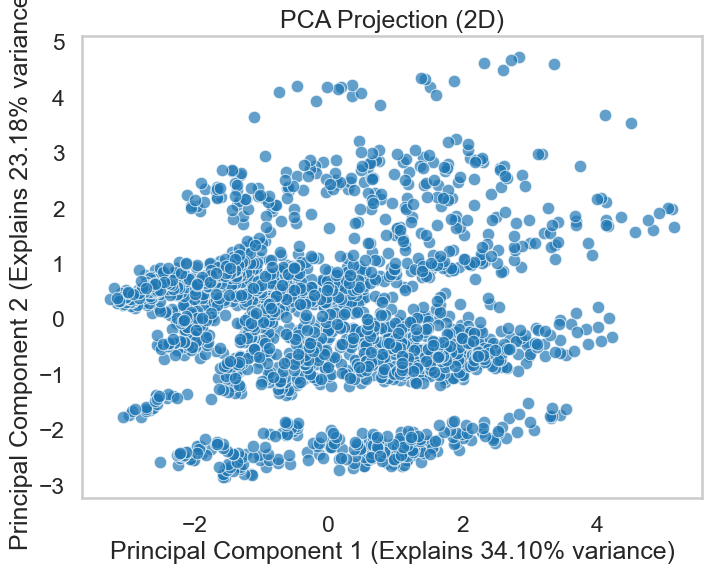

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(customer_scaled)  # X_scaled should be standardized (mean=0, std=1)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1 (Explains {:.2f}% variance)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("Principal Component 2 (Explains {:.2f}% variance)".format(pca.explained_variance_ratio_[1] * 100))
plt.grid()
plt.show()

For k=2:
   SSD (Distortion Function): 5260.9295
   Silhouette Score: 0.4007

For k=3:
   SSD (Distortion Function): 3578.4050
   Silhouette Score: 0.4272

For k=4:
   SSD (Distortion Function): 2783.5335
   Silhouette Score: 0.3897

For k=5:
   SSD (Distortion Function): 2265.9401
   Silhouette Score: 0.3676

For k=6:
   SSD (Distortion Function): 1928.7299
   Silhouette Score: 0.3778

For k=7:
   SSD (Distortion Function): 1599.9834
   Silhouette Score: 0.4003



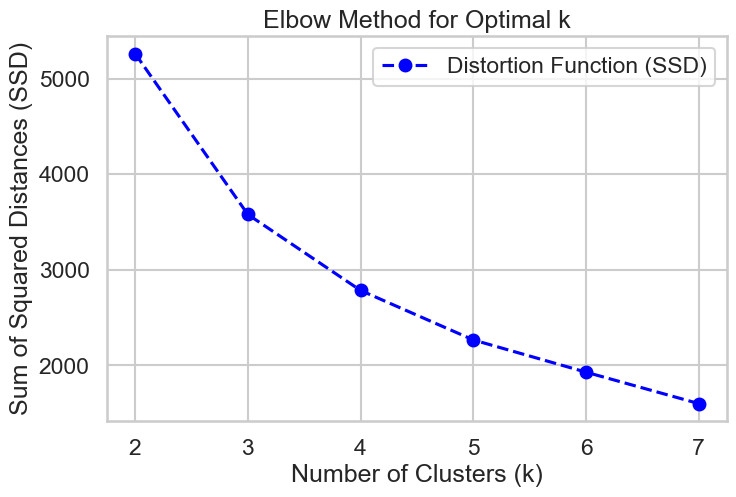

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []  # Stores the Sum of Squared Distances (SSD)
sil_scores = []  # Stores silhouette scores
k_values = range(2, 8)  # Range of k values

for k in k_values:
    model = KMeans(n_clusters=k,init='k-means++', random_state=42, n_init=10)  # Use K-Means++
    model.fit_predict(X_pca)
    
    cluster_labels = model.predict(X_pca)  # Predict clusters
    
    # Compute SSD (Distortion Function)
    inertia = model.inertia_  # Sum of squared distances to closest cluster center
    ssd.append(inertia)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(X_pca, cluster_labels)
    sil_scores.append(sil_score)
    
    print(f'For k={k}:')
    print(f'   SSD (Distortion Function): {inertia:.4f}')
    print(f'   Silhouette Score: {sil_score:.4f}\n')

# Plot the Distortion Function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--', color='b', label="Distortion Function (SSD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()






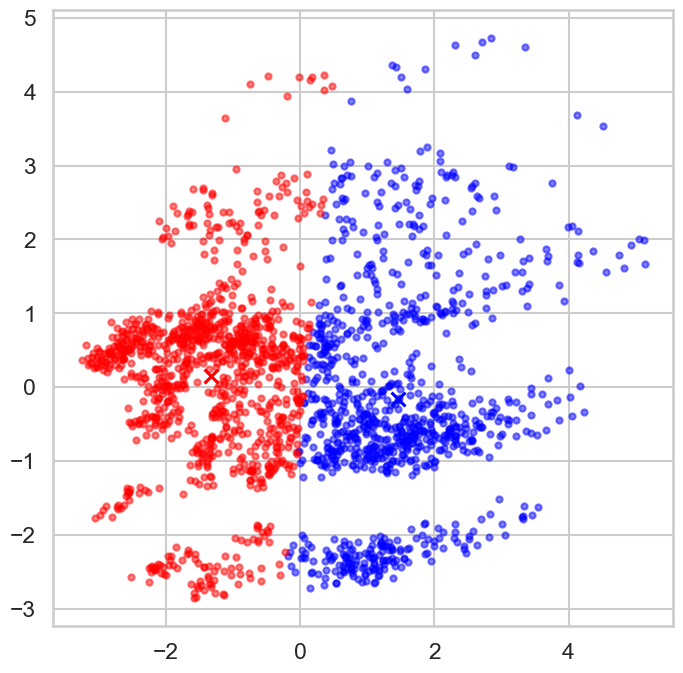

In [ ]:
model = KMeans(n_clusters=2, random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 2)

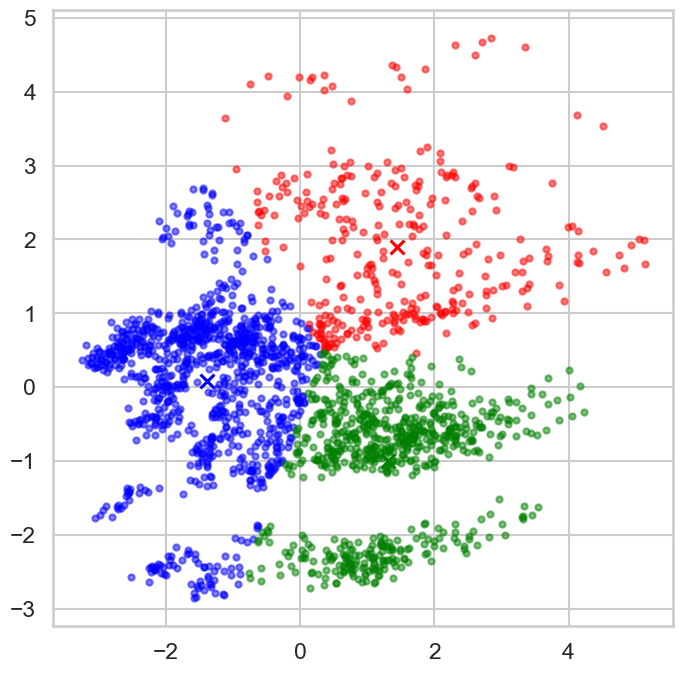

In [ ]:
model = KMeans(n_clusters=3,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 3)

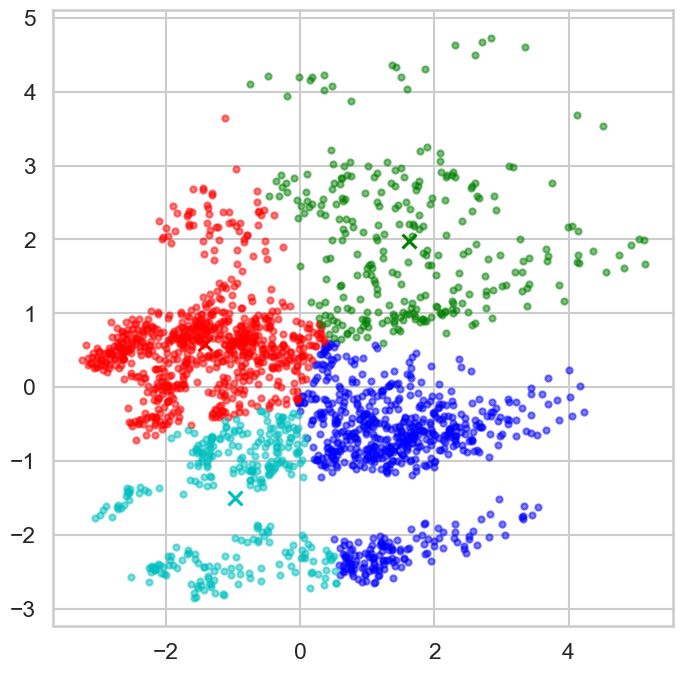

In [ ]:
model = KMeans(n_clusters=4,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 4)

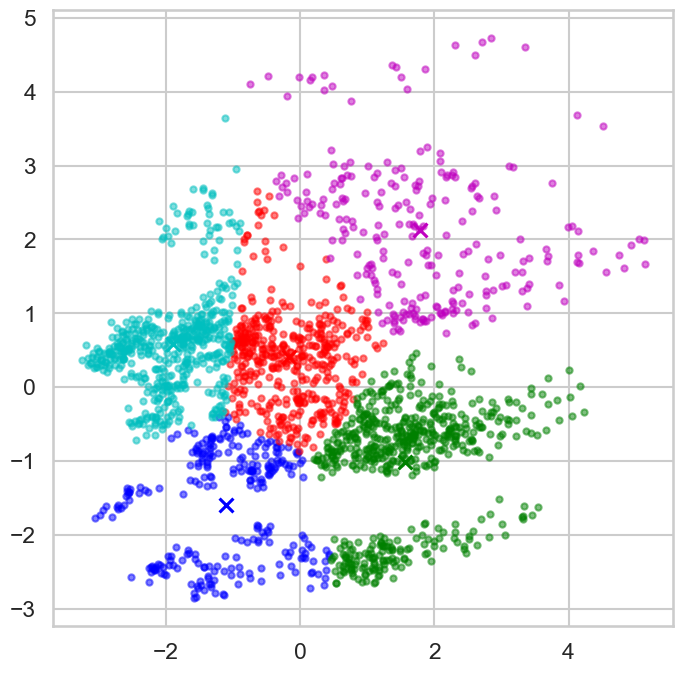

In [ ]:
model = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10) 
model.fit_predict(X_pca)
display_cluster(X_pca, model, 5)


In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s = []
linkage_list = ["average", "single", "complete","ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 10)
distance_thresholds = [None, 5, 10, 15]

best = float('-inf')
best_affinity = ""
best_n = None
best_linkage = ""
best_distance_threshold = None

for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            for dist_threshold in distance_thresholds:
                # Skip invalid combinations
                if linkage == "ward" and affinity != "euclidean":
                    continue  

                # Initialize clustering model
                model = AgglomerativeClustering(
                    n_clusters=n_clusters if dist_threshold is None else None,  # Use n_clusters if threshold is None
                    metric=affinity,
                    linkage=linkage,
                    distance_threshold=dist_threshold
                )
                
                # Fit model
                model.fit(customer_data)

                # Compute silhouette score (Only valid if more than 1 cluster is formed)
                if len(set(model.labels_)) > 1 and len(set(model.labels_)) < len(customer_data):  
                    silhouette = silhouette_score(customer_data, model.labels_)
                    s.append(silhouette)

                    print(f"Silhouette Score for {n_clusters} clusters, {affinity} affinity, {linkage} linkage, distance_threshold={dist_threshold}: {silhouette:.4f}")

                    if silhouette > best and n_clusters > 2:
                        best_n = n_clusters
                        best = silhouette
                        best_affinity = affinity
                        best_linkage = linkage
                        best_distance_threshold = dist_threshold

print(f"\nBest model: {best_n} clusters, linkage = {best_linkage}, affinity = {best_affinity}, distance_threshold = {best_distance_threshold}, Silhouette Score = {best:.4f}")


Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=None: 0.7291
Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=10: 0.0010
Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=15: 0.0019
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=None: 0.7584
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=10: 0.0010
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=15: 0.0019
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=None: 0.6592
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=10: 0.0010
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=15: 0.0019
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=None: 0.

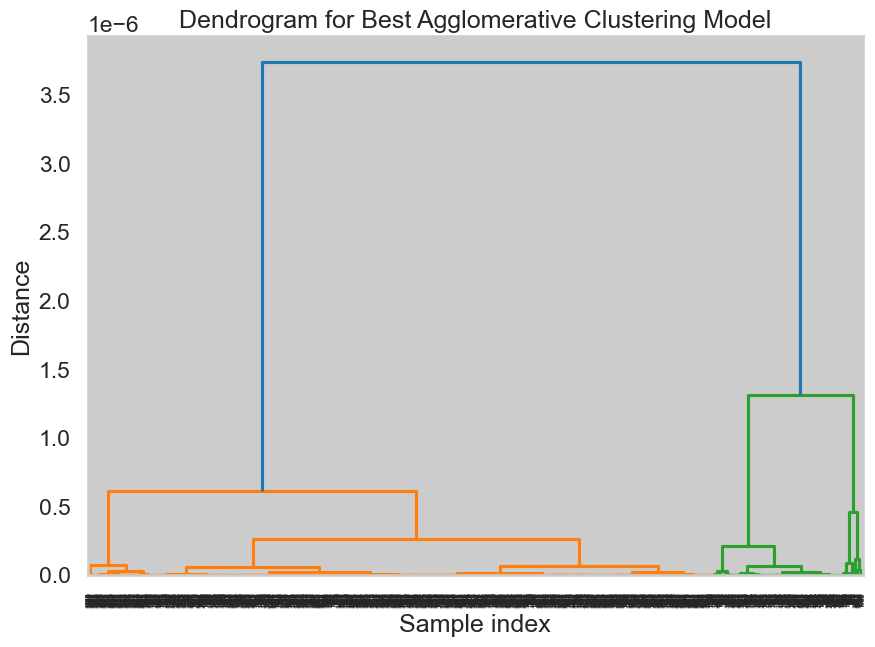

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Correct the metric if it is 'manhattan'
metric = 'cityblock' if best_affinity == 'manhattan' else best_affinity

# Generate the linkage matrix
Z = linkage(customer_data, method="complete", metric="cosine")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Best Agglomerative Clustering Model")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

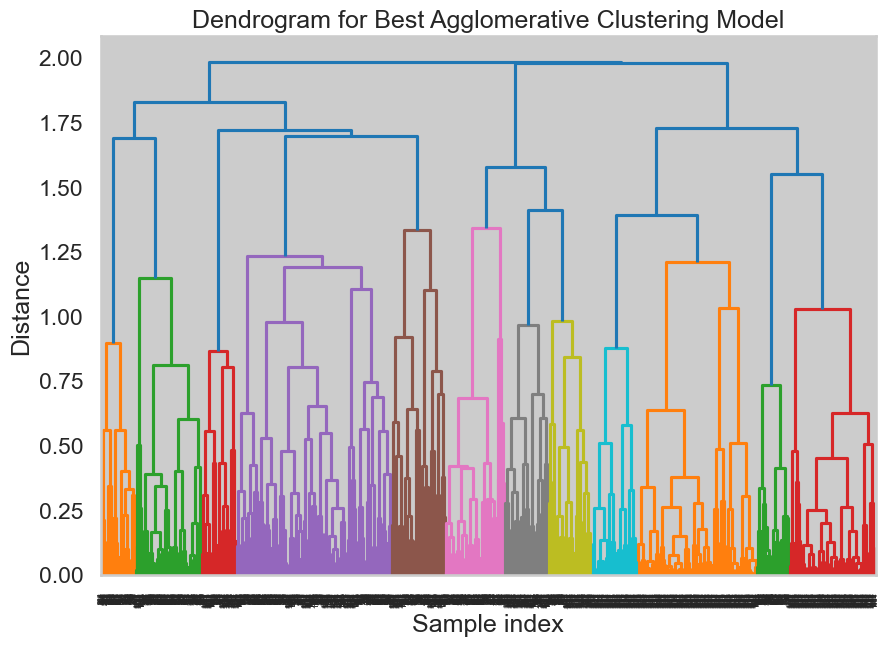

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Correct the metric if it is 'manhattan'
metric = 'cityblock' if best_affinity == 'manhattan' else best_affinity

# Generate the linkage matrix
Z = linkage(customer_scaled, method="complete", metric="cosine")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Best Agglomerative Clustering Model")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s = []
linkage_list = ["average", "single", "complete","ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
n_clusters_range = np.arange(2, 10)
distance_thresholds = [None, 5, 10, 15]

best = float('-inf')
best_affinity = ""
best_n = None
best_linkage = ""
best_distance_threshold = None

for n_clusters in n_clusters_range:
    for affinity in affinity_list:
        for linkage in linkage_list:
            for dist_threshold in distance_thresholds:
                # Skip invalid combinations
                if linkage == "ward" and affinity != "euclidean":
                    continue  

                # Initialize clustering model
                model = AgglomerativeClustering(
                    n_clusters=n_clusters if dist_threshold is None else None,  # Use n_clusters if threshold is None
                    metric=affinity,
                    linkage=linkage,
                    distance_threshold=dist_threshold
                )
                
                # Fit model
                model.fit(customer_scaled)

                # Compute silhouette score (Only valid if more than 1 cluster is formed)
                if len(set(model.labels_)) > 1 and len(set(model.labels_)) < len(customer_scaled):  
                    silhouette = silhouette_score(customer_scaled, model.labels_)
                    s.append(silhouette)

                    print(f"Silhouette Score for {n_clusters} clusters, {affinity} affinity, {linkage} linkage, distance_threshold={dist_threshold}: {silhouette:.4f}")

                    if silhouette > best:
                        best_n = n_clusters
                        best = silhouette
                        best_affinity = affinity
                        best_linkage = linkage
                        best_distance_threshold = dist_threshold

print(f"\nBest model: {best_n} clusters, linkage = {best_linkage}, affinity = {best_affinity}, distance_threshold = {best_distance_threshold}, Silhouette Score = {best:.4f}")


Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=None: 0.3659
Silhouette Score for 2 clusters, euclidean affinity, average linkage, distance_threshold=5: 0.3659
Silhouette Score for 2 clusters, euclidean affinity, single linkage, distance_threshold=None: 0.3099
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=None: 0.2421
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=5: 0.1625
Silhouette Score for 2 clusters, euclidean affinity, complete linkage, distance_threshold=10: 0.2421
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=None: 0.2108
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=5: 0.3683
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=10: 0.3404
Silhouette Score for 2 clusters, euclidean affinity, ward linkage, distance_threshold=15: 0.2885
Silho

No valid DBScan parameters found.


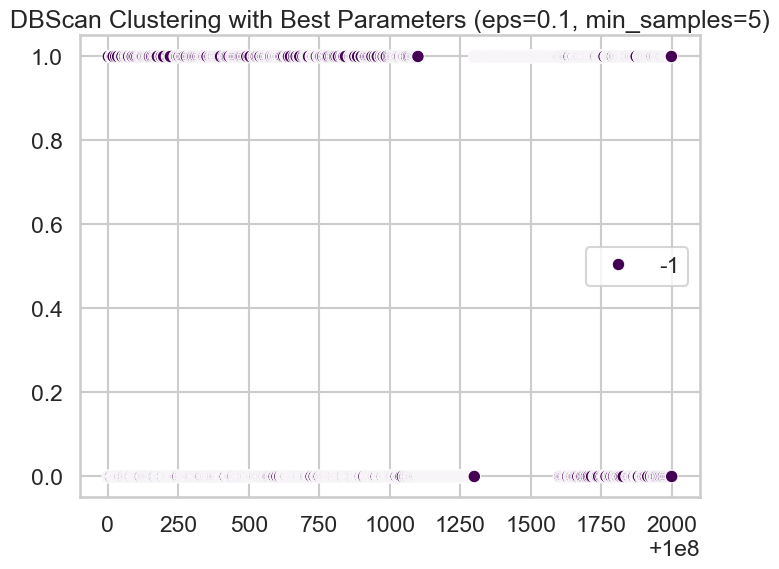

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Use the dataset generated earlier (Multi_blob_Data)
X = customer_data.values  # Convert DataFrame to NumPy array

# Define the range of parameters to test
eps_values = np.linspace(0.1, 4, 30)  
min_samples_values = np.arange(5, 26, 2)  # Vary min_samples from 5 to 25

# Store the best results
best_score = float('-inf')
best_eps = eps_values[0]  # Initialize with the first value in eps_values
best_min_samples = min_samples_values[0]  # Initialize with the first value in min_samples_values
silhouette_scores = []


for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

            # Track the best score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


silhouette_scores = np.array(silhouette_scores)


if best_score > float('-inf'):
    print(f"Best DBScan parameters: EPS = {best_eps:.2f}, Min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")
else:
    print("No valid DBScan parameters found.")

# 📊 Plot the Best Clustering Result
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.show()


Best DBScan parameters: EPS = 2.39, Min_samples = 20, Silhouette Score = 0.3646


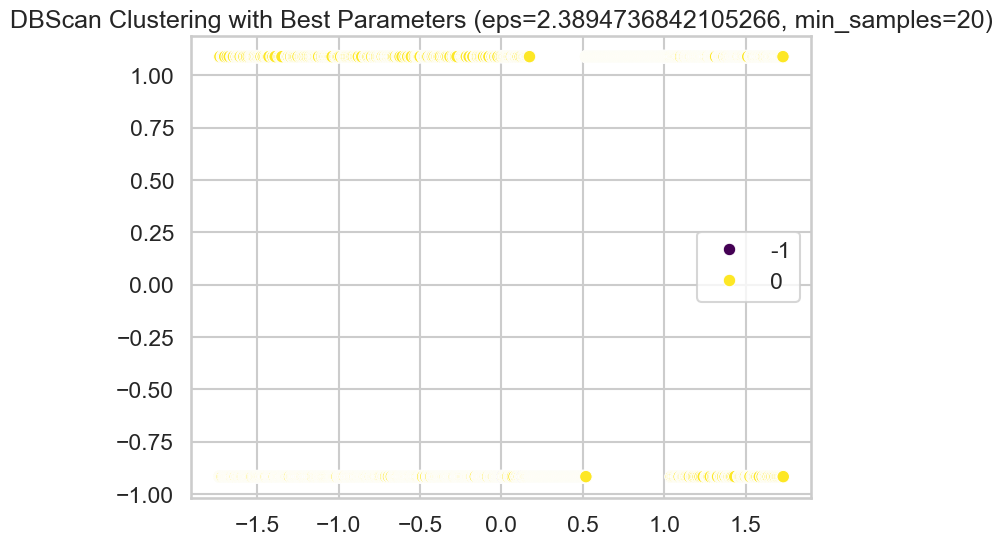

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Use the dataset generated earlier (Multi_blob_Data)
X = customer_scaled.values  # Convert DataFrame to NumPy array

# Define the range of parameters to test
eps_values = np.linspace(0.1, 3, 20)  
min_samples_values = np.arange(5, 26, 5)  # Vary min_samples from 5 to 25

# Store the best results
best_score = float('-inf')
best_eps = None
best_min_samples = None
silhouette_scores = []


for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, score))

            # Track the best score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


silhouette_scores = np.array(silhouette_scores)


print(f"Best DBScan parameters: EPS = {best_eps:.2f}, Min_samples = {best_min_samples}, Silhouette Score = {best_score:.4f}")

# 📊 Plot the Best Clustering Result
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=best_labels, palette="viridis", legend="full")
plt.title(f"DBScan Clustering with Best Parameters (eps={best_eps}, min_samples={best_min_samples})")
plt.show()


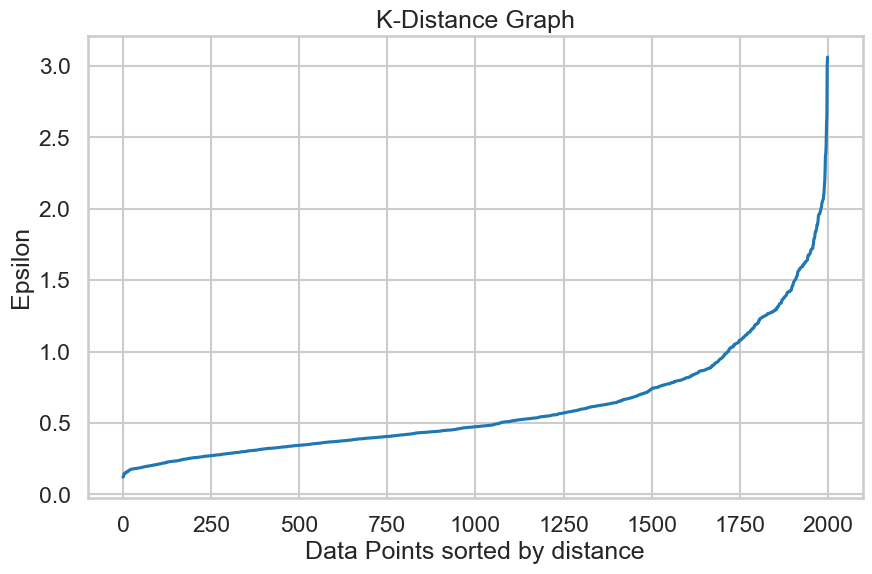

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Compute the k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(customer_scaled)
distances, indices = neighbors.kneighbors(customer_scaled)

# Sort the distances (5th column) and plot
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

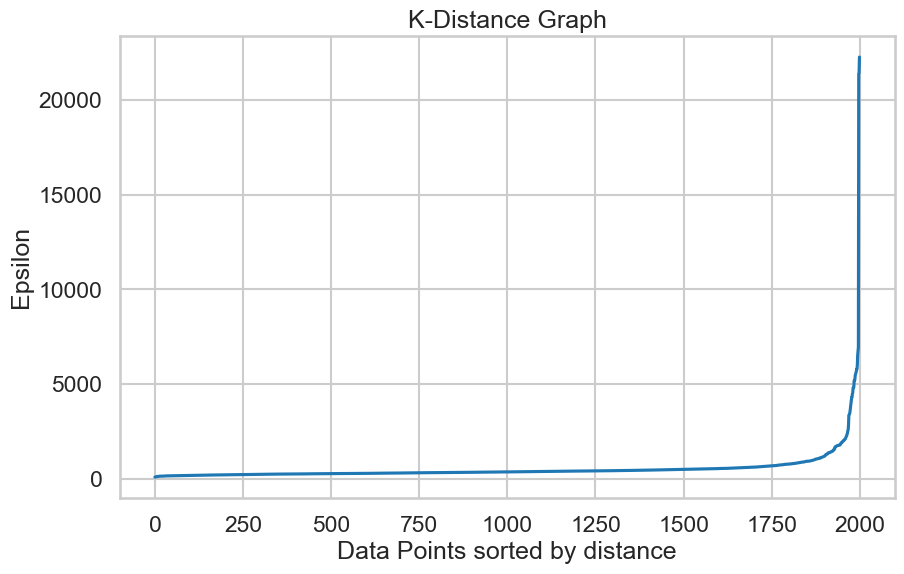

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

import matplotlib.pyplot as plt

# Compute the k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(customer_data)
distances, indices = neighbors.kneighbors(customer_data)

# Sort the distances (5th column) and plot
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()